# **Bank Marketing Effectiveness Prediction**

### **<u>Project Summary</u>**

This project aimed to predict the effectiveness of bank marketing campaigns using machine learning techniques on a dataset from a Portuguese banking institution. After preprocessing the data and handling issues like missing values, outliers, and class imbalance, various classification algorithms were trained and evaluated. XGBoost emerged as the best-performing model with high accuracy, precision, recall, F1 score, and roc auc score, indicating its effectiveness in predicting whether clients will subscribe to term deposits. Feature importance analysis revealed key variables influencing the prediction, and SHAP technique was used for model explanation. Despite challenges in model tuning and testing, the project successfully demonstrated the potential of machine learning in optimizing bank marketing strategies.

.

### **<u>GitHub Link</u>**

sd


### **<u>Problem Statement</u>**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### **<u>Data Description</u>**

- age: age of client (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- balance: Account balance of client
- day: last contact day of the month
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no')

.

In [1]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'shap'

In [3]:
# Loabding Dataset
df=pd.read_csv("bank_marketing.csv", sep =";")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
# First Five Observations
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
# Last five observations
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

## **<u>Data Inispection</u>**

In [6]:
# Checking shape of the dataset
df.shape

(45211, 17)

- Dataset having 45211 observations and 17 columns

In [7]:
# Checking columns name of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- In the dataset, there are object, float64, and int64 dtypes features present.

In [9]:
# Bsic description of Dataset
df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [11]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

number_of_nulls_values
columns                          
age                             0
day                             0
poutcome                        0
previous                        0
pdays                           0
campaign                        0
duration                        0
month                           0
contact                         0
job                             0
loan                            0
housing                         0
balance                         0
default                         0
education                       0
marital                         0
y                               0

<b><u>Observations :</u></b>
- **Dataset having 45211 observations and 17 columns.**
- **In the dataset, there are object, float64, and int64 dtypes features present.**
- **Dataset having 0 duplicated values.**
- **There are no null/missing values in the dataset.**

## **<u>Understanding Variables</u>**

In [13]:
# Basic description of Dataset
df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [14]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [15]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [16]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------------------------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----------------------------------------------------------------------

## **<u>Data Wrangling and Feature Engineering</u>**

#### Handling Duplicate Values

In [18]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


#### Handling Null / Missing Values

In [19]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [20]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

number_of_nulls_values  percentage_null_values
columns                                                  
poutcome                    36959                   81.75
contact                     13020                   28.80
education                    1857                    4.11
job                           288                    0.64
month                           0                    0.00
previous                        0                    0.00
pdays                           0                    0.00
campaign                        0                    0.00
duration                        0                    0.00
age                             0                    0.00
day                             0                    0.00
loan                            0                    0.00
housing                         0                    0.00
balance                         0                    0.00
default                         0                    0.00
marital                         0                    0.00
y                               0                    0.00

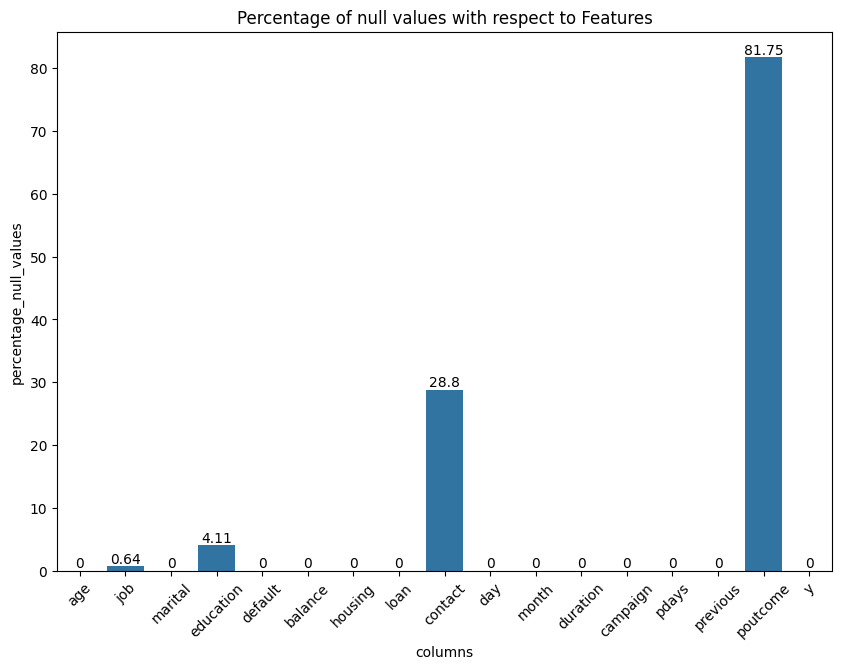

In [21]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=count_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

- The null values for poutcome, contact, education, and job are 81.75%, 28.80%, 4.11%, and 0.64%, respectively.

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

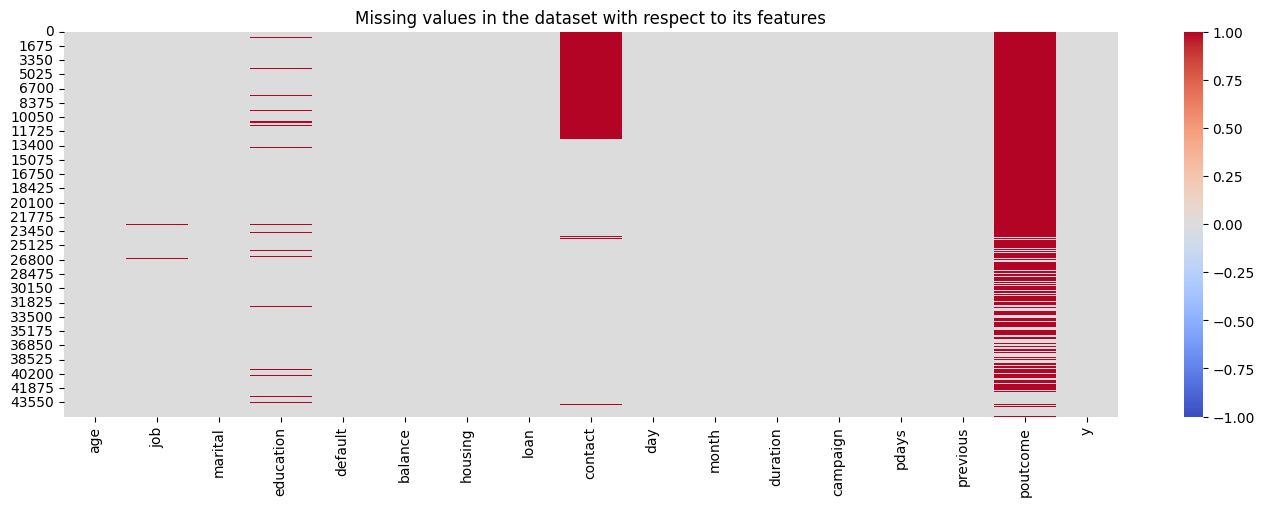

In [22]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.title('Missing values in the dataset with respect to its features')

In [23]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64
------------------------------------------------------------------------------------------
contact
cellular     29285
telephone     2906
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [24]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [25]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [26]:
# Nullfree shape of dataset
df.shape

(45211, 16)

- Replaced null values for features like contact, education, and job with their modes. In addition, removed features with more than 50% null values because they were worthless and hindered model performance.

#### <u>Handling Outliers

<ipython-input-27-fb8b1eb07b7f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[var], fit=norm)


__________________________________________________________________________________________


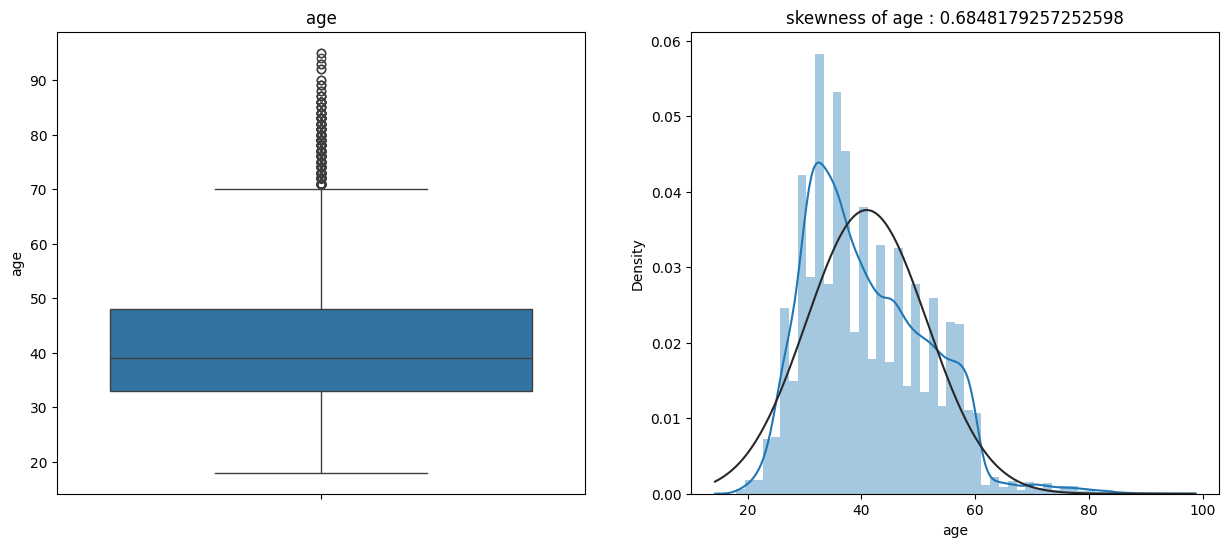

<ipython-input-27-fb8b1eb07b7f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[var], fit=norm)


__________________________________________________________________________________________


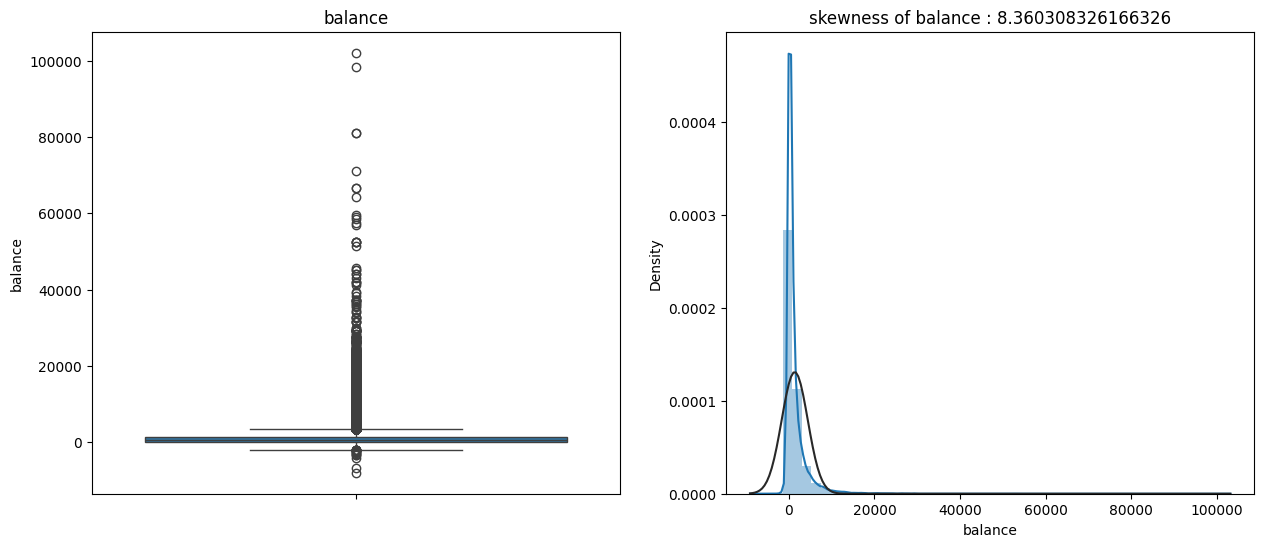

<ipython-input-27-fb8b1eb07b7f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[var], fit=norm)


__________________________________________________________________________________________


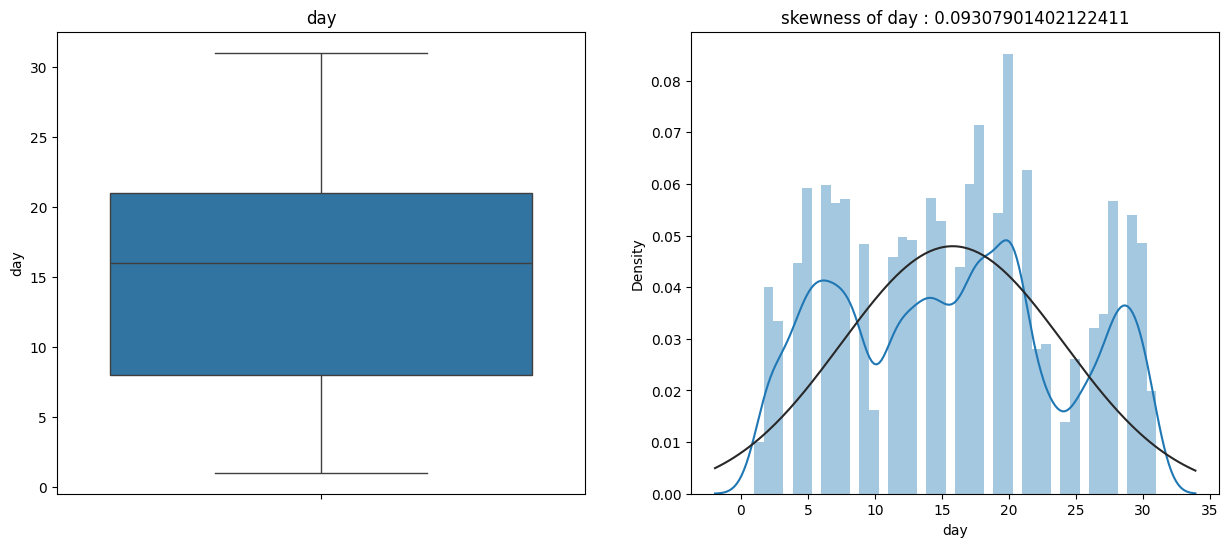

<ipython-input-27-fb8b1eb07b7f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[var], fit=norm)


__________________________________________________________________________________________


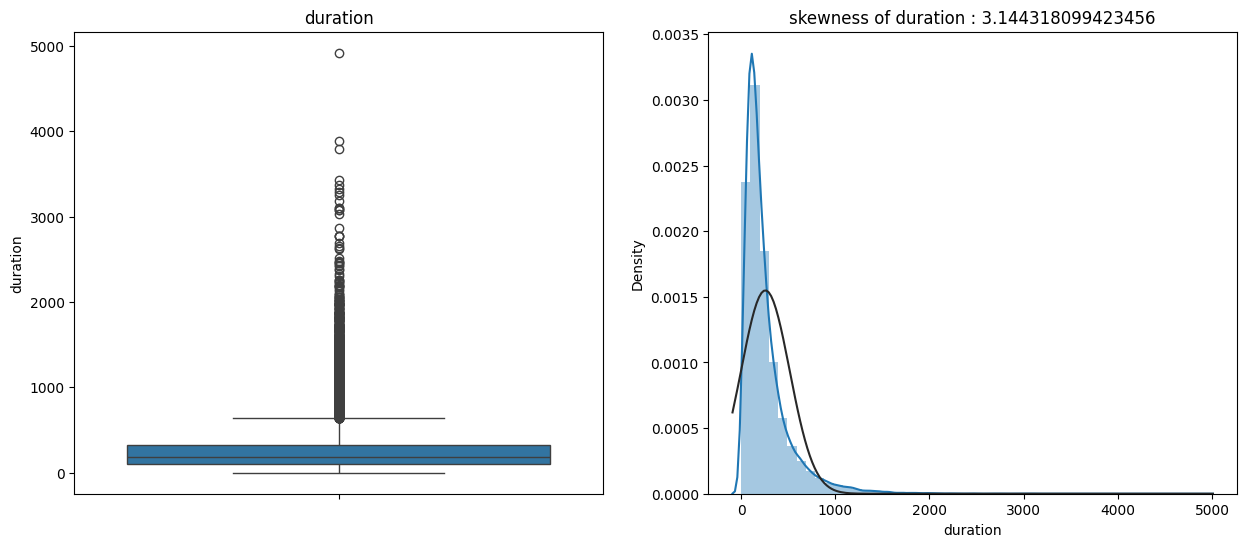

<ipython-input-27-fb8b1eb07b7f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[var], fit=norm)


__________________________________________________________________________________________


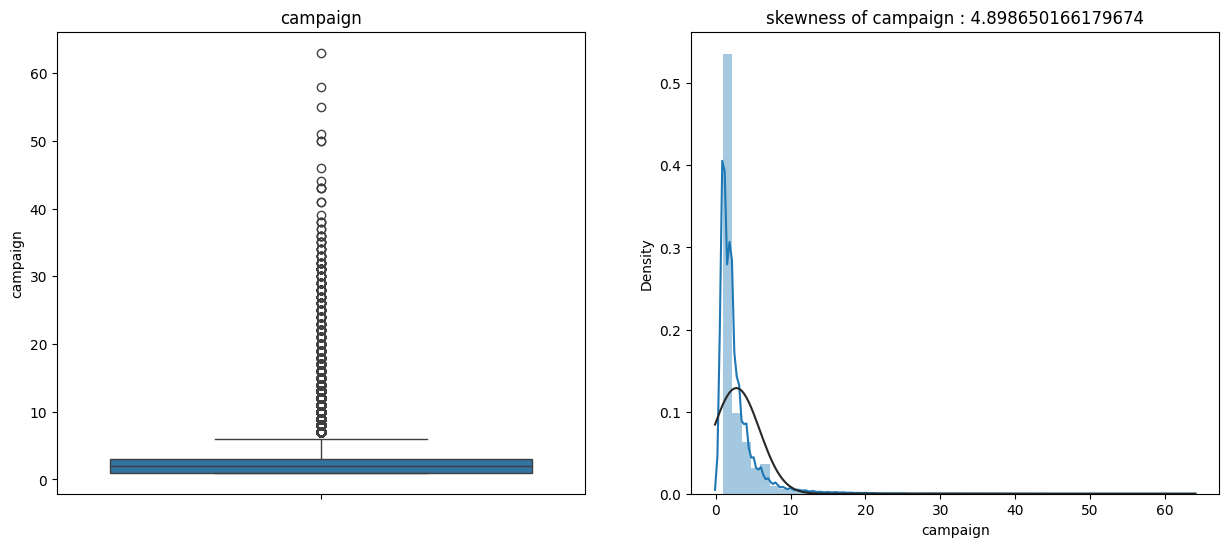

<ipython-input-27-fb8b1eb07b7f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[var], fit=norm)


__________________________________________________________________________________________


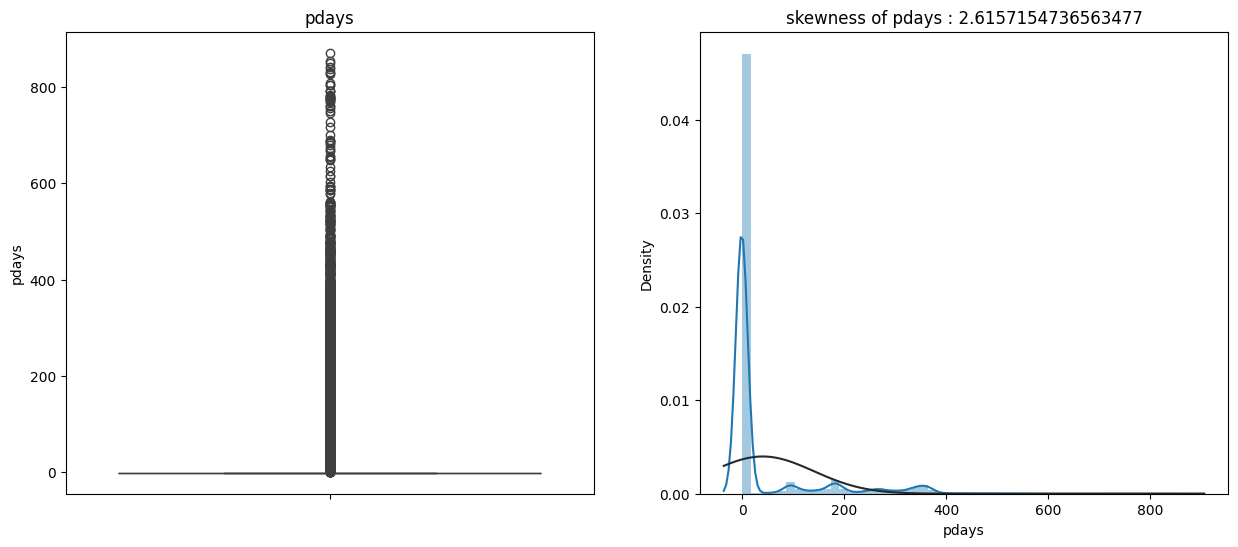

<ipython-input-27-fb8b1eb07b7f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[var], fit=norm)


__________________________________________________________________________________________


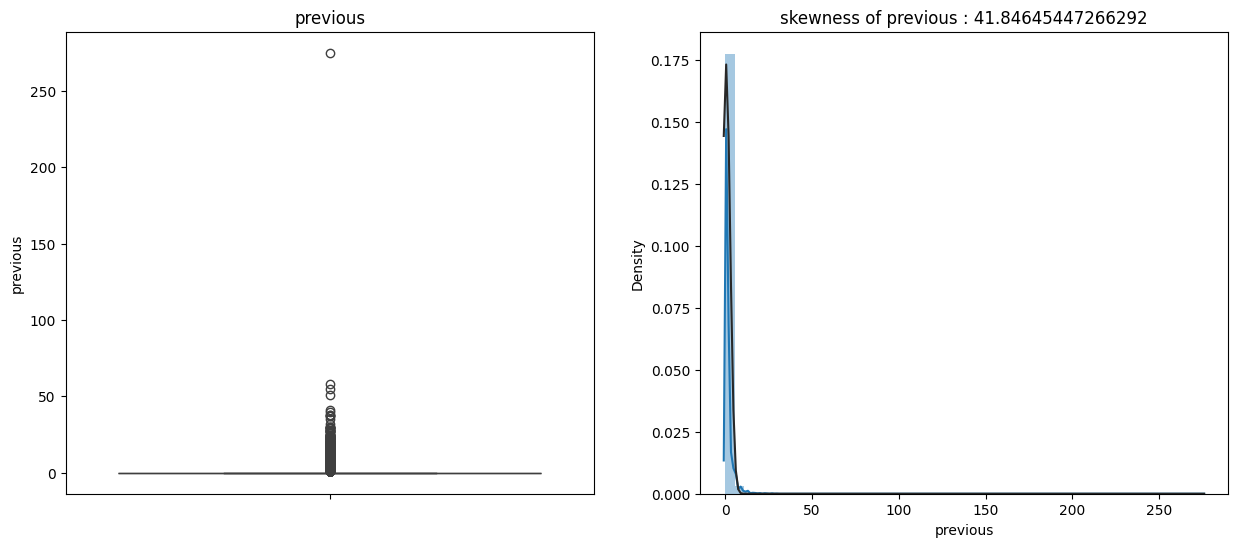

In [27]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns.
- Variable day does not have any outliers.

In [ ]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


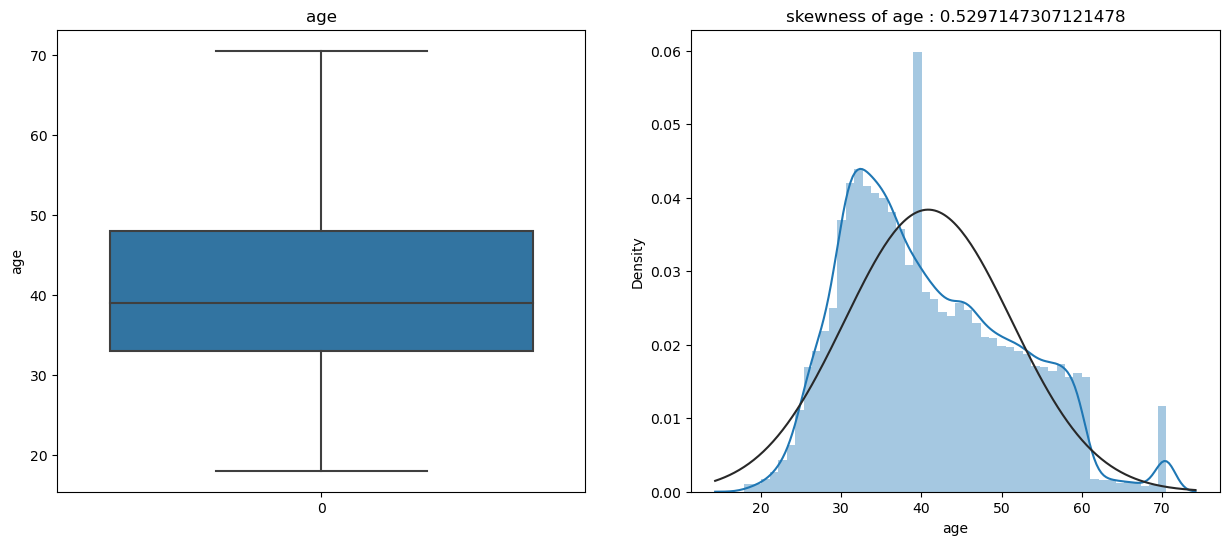

__________________________________________________________________________________________


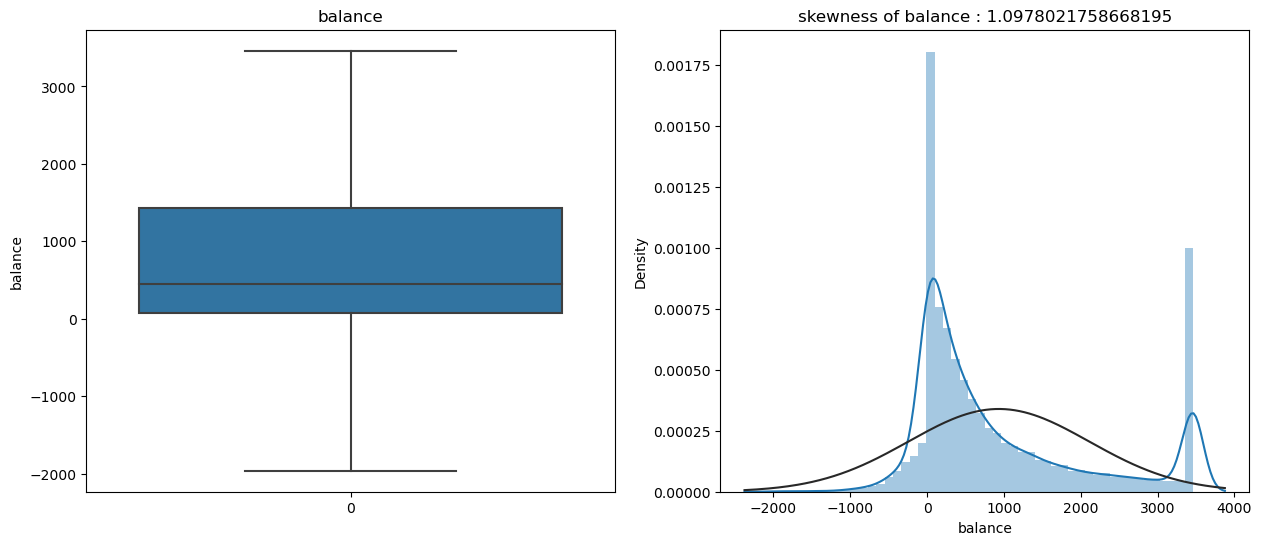

__________________________________________________________________________________________


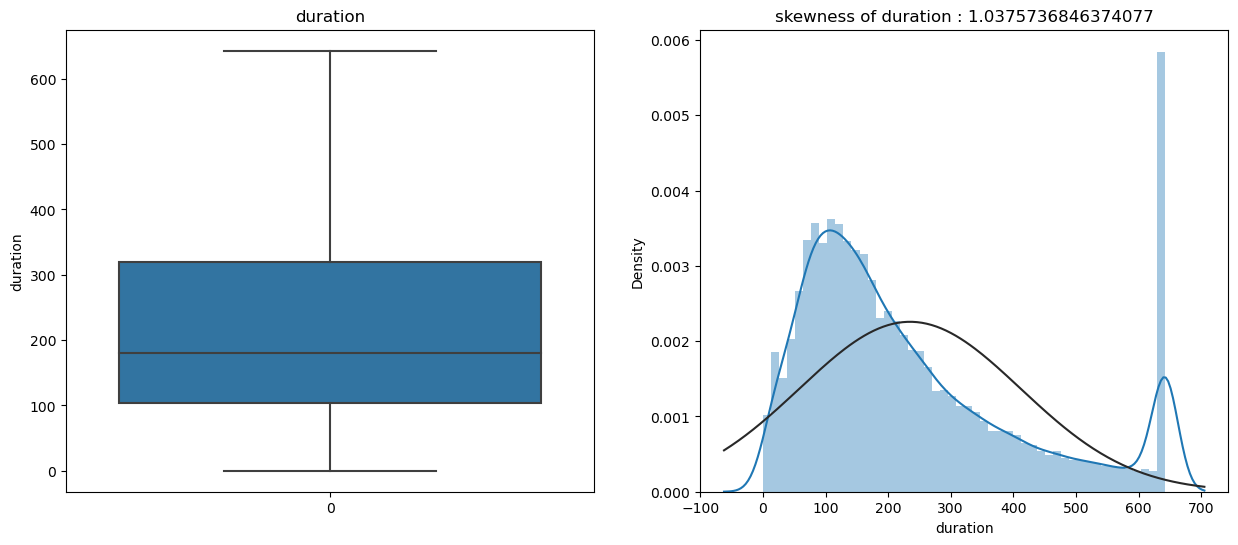

__________________________________________________________________________________________


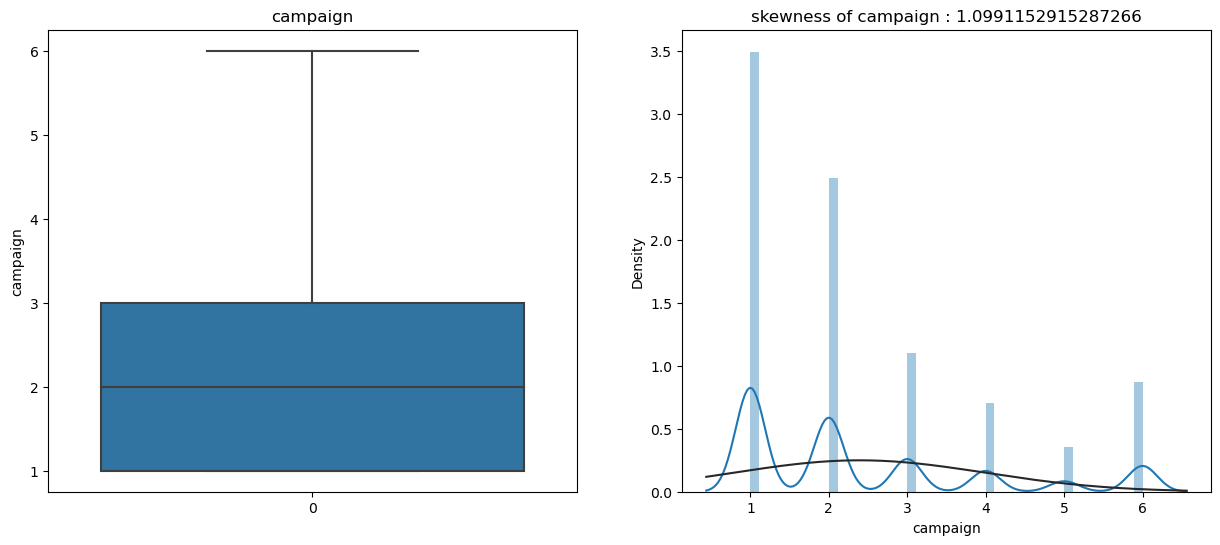

In [ ]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- Outliers are successfully removed from the dataset.

**<u>Observations :</u>**
- This dataset contains no values that are duplicates.
- Job, education, contacts, and poutcome each have unknown values of 288; 1857; 13020; and 36959. Since unknown values are not defined and can be removed from features by treatment, they can be handled as null.
- Poutcome, contact, education, and job all have null values of 81.45%, 28.80%, 4.11%, and 0.64%, respectively.
- Replaced null values with their equivalent modes for features like contact, education, and employment. Additionally, features with more than 50% null values were eliminated because they were useless and negatively impacted model performance.
- Outliers are treated using the interquartile range for the variables age, balance, duration, campaign, p-days, and previous. It is better to eliminate the columns pdays and previous because they have an interquartile range which is flat.
- No outliers exist on a variable day.

.

## **<u>Exploratory data analysis</u>**

#### **<u>[1] Univariate Analysis</u>**

In [28]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [29]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

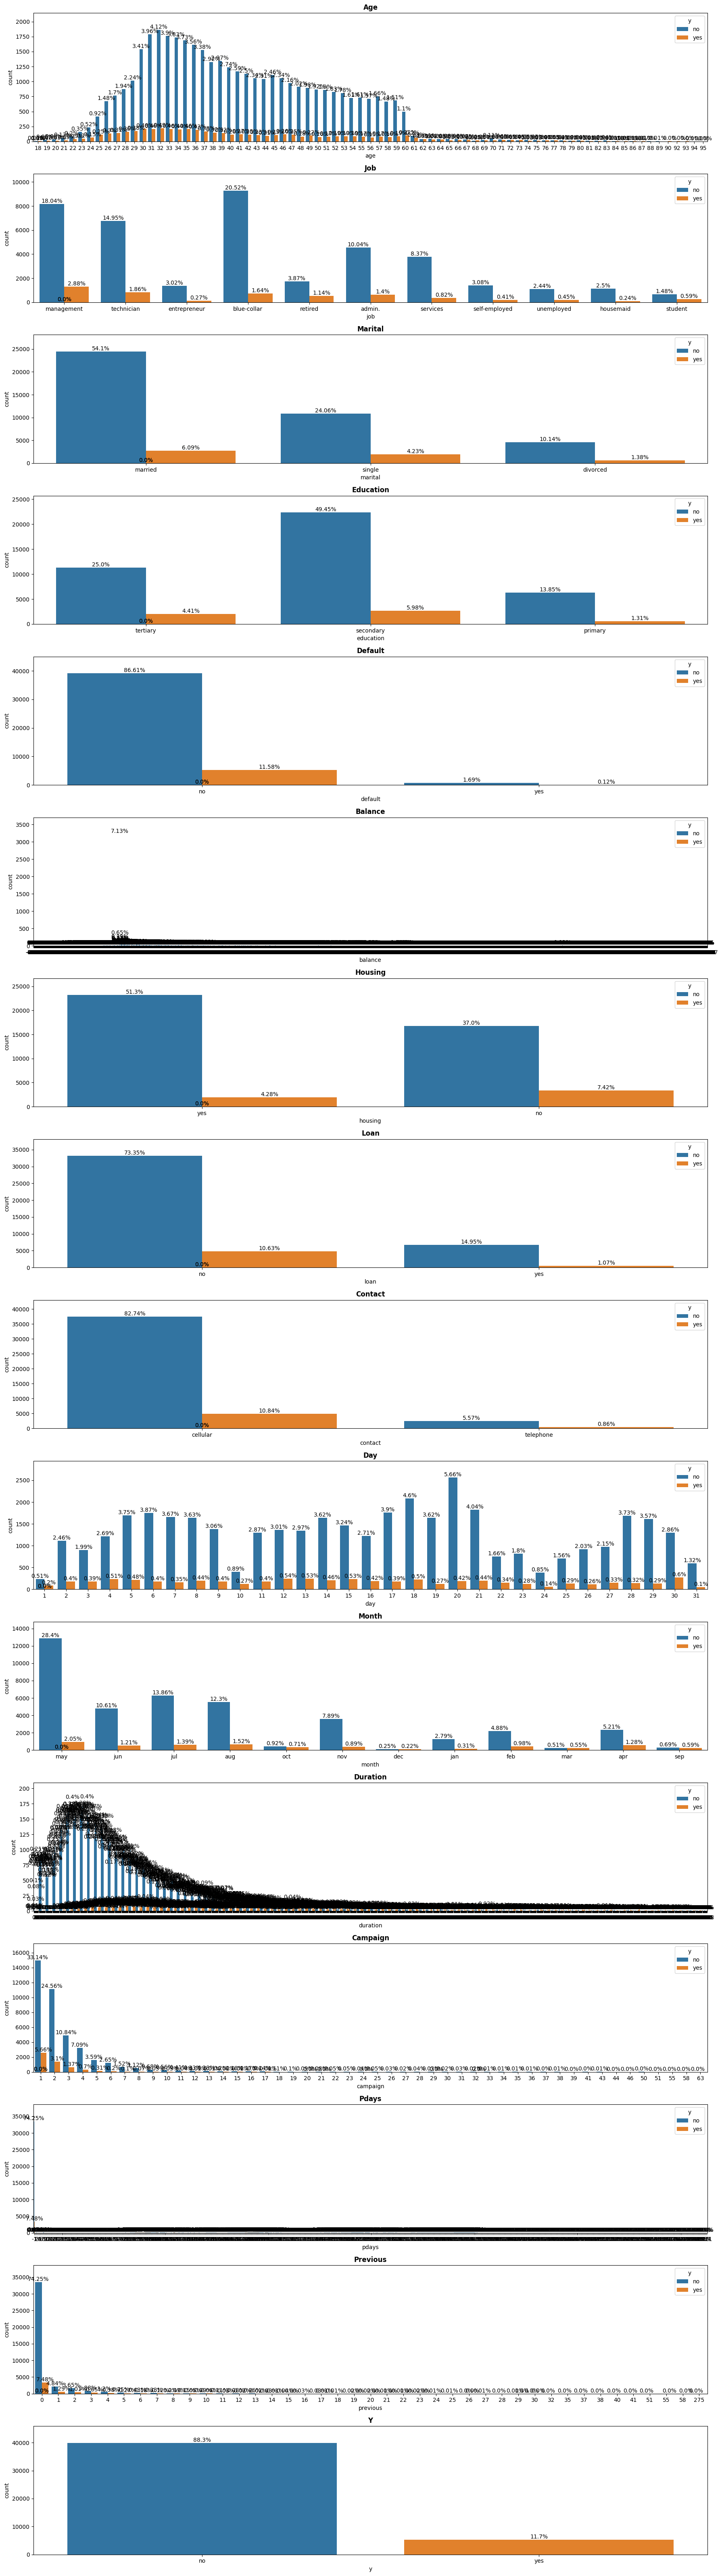

In [30]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*4))
for n,var in enumerate(df.columns):
    plot = plt.subplot(r,1,n+1)
    sns.countplot(x=df[var], hue=df['y']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

## **<u>Data Pre-processing</u>**

#### **<u>[1] Categorical Encoding</u>**

In [31]:
# Checking basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [32]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [33]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
__________________________________________________________________________________________
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
__________________________________________________________________________________________
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
__________________________________________________________________________________________
default
no     44396
yes      815
Name: count, dtype: int64
__________________________________________________________________________________________
housing
yes    25130
no     20081
Name: count, dtype: int64
____________________________________________________

In [34]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [35]:
## One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [36]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   marital            45211 non-null  int64
 2   education          45211 non-null  int64
 3   default            45211 non-null  int64
 4   balance            45211 non-null  int64
 5   housing            45211 non-null  int64
 6   loan               45211 non-null  int64
 7   contact            45211 non-null  int64
 8   day                45211 non-null  int64
 9   duration           45211 non-null  int64
 10  campaign           45211 non-null  int64
 11  pdays              45211 non-null  int64
 12  previous           45211 non-null  int64
 13  y                  45211 non-null  int64
 14  job_blue-collar    45211 non-null  bool 
 15  job_entrepreneur   45211 non-null  bool 
 16  job_housemaid      45211 non-null  bool 
 17  job_manageme

In [37]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

age  marital  education  default  balance  housing  loan  contact  day  \
0   58        1          1        0     2143        1     0        1    5   
1   44        0          0        0       29        1     0        1    5   
2   33        1          0        0        2        1     1        1    5   
3   47        1          0        0     1506        1     0        1    5   
4   33        0          0        0        1        0     0        1    5   

   duration  campaign  pdays  previous  y  job_blue-collar  job_entrepreneur  \
0       261         1     -1         0  0            False             False   
1       151         1     -1         0  0            False             False   
2        76         1     -1         0  0            False              True   
3        92         1     -1         0  0             True             False   
4       198         1     -1         0  0             True             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False            True        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  month_aug  \
0         False        False           False           False      False   
1         False        False            True           False      False   
2         False        False           False           False      False   
3         False        False           False           False      False   
4         False        False           False           False      False   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   month_may  month_nov  month_oct  month_sep  
0       True      False      False      False  
1       True      False      False      False  
2       True      False      False      False  
3       True      False      False      False  
4       True      False      False      False

#### **<u>[2] Separating Dependant and Independant variables</u>**

In [38]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

#### **<u>[3] Feature Manipulation & Selection</u>**

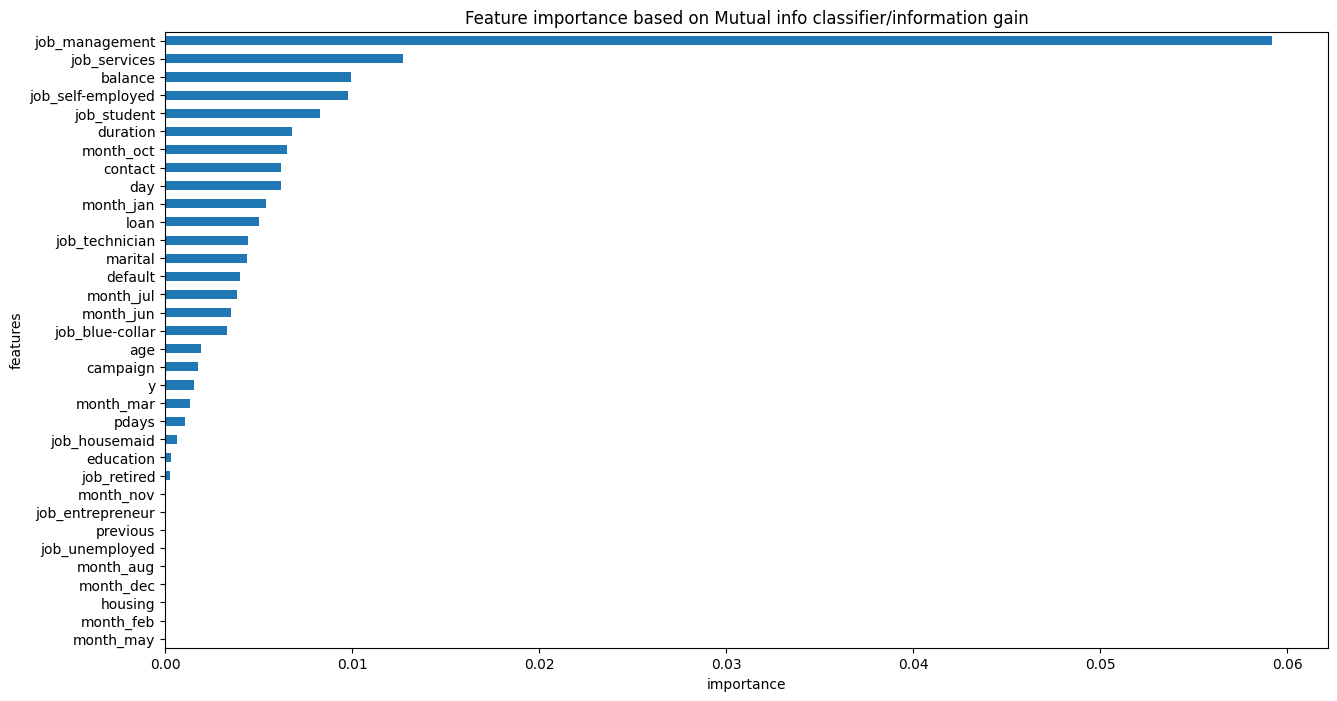

In [39]:
# Plotting feature importance for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:34])]).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/information gain")
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

**<u>Observations :</u>**
- Important features are listed in descending order of their importance and can be removed if they are no longer important, but all the features that we have included have significant importance, so we are keeping all of them.

.

#### **<u>[4] Handling Imbalanced Dataset</u>**

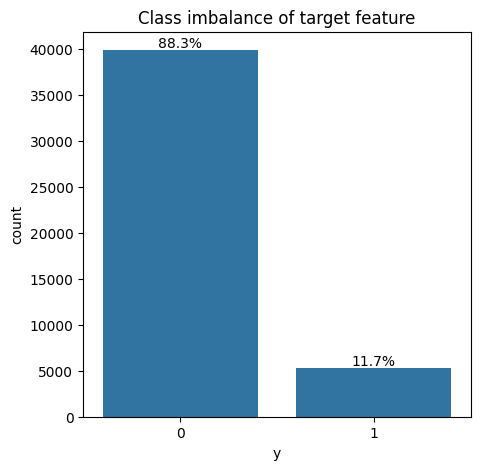

In [41]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['y'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

- We clearly detect a class imbalance beacause discovered that the number of clients who subscribed to term deposits is 11.7% lower than the number of clients who did not (88.3%).

In [42]:
# Import model imblearn in envirnoment
!pip install imblearn

In [43]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

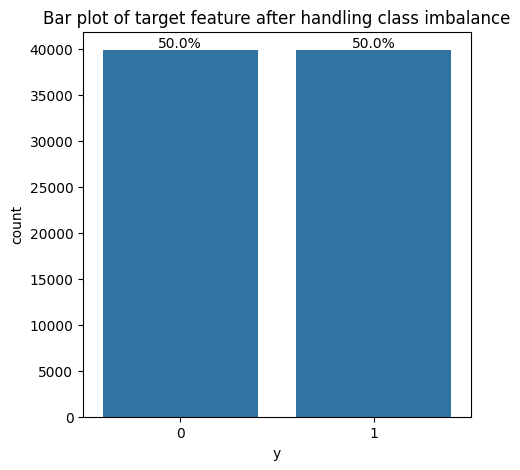

In [44]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
annot_percent(plot)
plt.show()

#### **<u>[5] Data Splitting</u>**

In [45]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [46]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


- We divided the dataset into 20% for model testing and 80% for training.

In [47]:
# Checking values of splitted dataset
X_train[0:3]

loan  job_blue-collar  month_jul  education  pdays  job_entrepreneur  \
76180     0            False      False          1     86             False   
36038     1            False      False          1     -1             False   
41791     0            False      False          1     -1             False   

       month_mar  month_sep  marital  contact  month_dec  default  month_feb  \
76180      False      False        1        1      False        0       True   
36038      False      False        1        1      False        0      False   
41791      False      False        1        1      False        0      False   

       month_jun  month_oct  job_housemaid  job_management  duration  \
76180      False      False          False           False       310   
36038      False      False          False           False        67   
41791      False       True          False            True        78   

       job_services  age  housing  month_may  campaign  job_self-employed  \
76180         False   75        0      False         1              False   
36038         False   50        1       True         1              False   
41791         False   62        0      False         3              False   

       month_aug  job_unemployed  month_jan  day  job_retired  job_student  \
76180      False           False      False   10        False        False   
36038      False           False      False   11         True        False   
41791      False           False      False   13        False        False   

       month_nov  job_technician  balance  previous  
76180      False           False     3324         3  
36038      False           False        4         0  
41791      False           False        0         0

In [48]:
# Checking values of splitted dataset
X_test[0:3]

loan  job_blue-collar  month_jul  education  pdays  job_entrepreneur  \
72809     0            False      False          0     -1             False   
71061     0            False      False          0     -1             False   
57176     0            False      False          0     -1             False   

       month_mar  month_sep  marital  contact  month_dec  default  month_feb  \
72809      False      False        2        1      False        0      False   
71061      False      False        1        1      False        0      False   
57176      False      False        1        0      False        0       True   

       month_jun  month_oct  job_housemaid  job_management  duration  \
72809      False      False          False           False       173   
71061      False      False          False           False      1492   
57176      False      False          False           False       744   

       job_services  age  housing  month_may  campaign  job_self-employed  \
72809         False   66        0      False         1              False   
71061         False   33        1      False         2              False   
57176         False   54        0      False         2              False   

       month_aug  job_unemployed  month_jan  day  job_retired  job_student  \
72809      False           False      False   13        False        False   
71061      False           False      False   23        False        False   
57176      False           False      False    5        False        False   

       month_nov  job_technician  balance  previous  
72809      False           False     7110         0  
71061      False           False      993         0  
57176      False            True        0         0

#### **<u>[6] Data Scaling</u>**

In [49]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [50]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 0.        , 0.        , 0.5       , 0.09977064,
        0.        , 0.        , 0.        , 0.5       , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.06303375, 0.        , 0.74025974,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.3       , 0.        , 0.        ,
        0.        , 0.        , 0.06951141, 0.05263158],
       [1.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01362342, 0.        , 0.41558442,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 1.        , 0.        ,
        0.        , 0.        , 0.03824493, 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ,
  

In [51]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0351769 , 0.        , 0.62337662,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4       , 0.        , 0.        ,
        0.        , 0.        , 0.1051665 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30337536, 0.        , 0.19480519,
        1.        , 0.        , 0.01612903, 0.        , 0.        ,
        0.        , 0.        , 0.73333333, 0.        , 0.        ,
        0.        , 0.        , 0.04755895, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  

## **<u>ML Model Implementation</u>**

In [52]:
# Defining function which fit classification algoritham, evaluate and visualise model using train test split

# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Defining function
def classification_model(X_train, X_test, y_train, y_test, clf):
    """
    function fit the algorithm on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model using training dataset
    model=clf.fit(X_train, y_train)
    print(model)
    print('=='*45)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)

    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [53]:
# Defining function which fit classification algoritham using GridSearchCV, evaluate and visualise model

# Import necessary dependancy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Defining function
def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    """
    function fit the algorithm using GridSearchCV on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model on training dataset
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model)
    print('=='*45)

    # Print the best parameters and score
    print("Best parameters:", model.best_params_)
    print("Best score:", model.best_score_)
    print('=='*45)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)

    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [54]:
# Defining function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve
    """
    # Generate a list of false and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Plotting the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

### **[1] Logistic Regression**

LogisticRegression(max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[29742  2272]
 [ 3047 28814]]
Accuracy:  0.9167279843444227
Precision:  0.9269124364665766
Recall:  0.9043658391136499
F1 Score:  0.9155003415571831
roc_auc_score:  0.9166984440148747

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7319  589]
 [ 797 7264]]
Accuracy:  0.9132068382491076
Precision:  0.9249968165032472
Recall:  0.9011288921969979
F1 Score:  0.9129068744501697
roc_auc_score:  0.9133236772568196


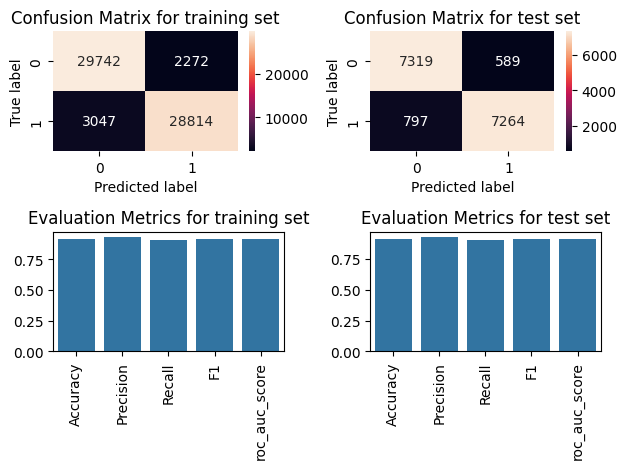

In [55]:
# Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression model to training set
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr=classification_model(X_train, X_test, y_train, y_test, Logistic_regression)

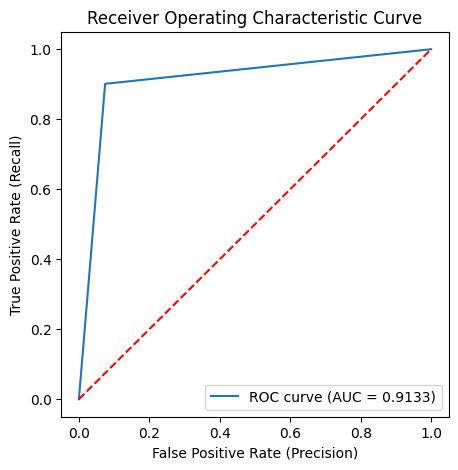

In [56]:
# Plot roc curve for Logistic Regression classifier
y_pred=lr['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 7 candidates, totalling 21 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 1000}
Best score: 0.9170880995919073
Training set evaluation result :

Confusion Matrix: 
 [[29706  2308]
 [ 3003 28858]]
Accuracy:  0.916853228962818
Precision:  0.9259449399987165
Recall:  0.9057468378268102
F1 Score:  0.9157345264727814
roc_auc_score:  0.9168266893575857

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7302  606]
 [ 780 7281]]
Accuracy:  0.9132068382491076
Precision:  0.9231647014073793
Recall:  0.903237811685895
F1 Score:  0.9130925507900677
roc_auc_score:  0.9133032761009141


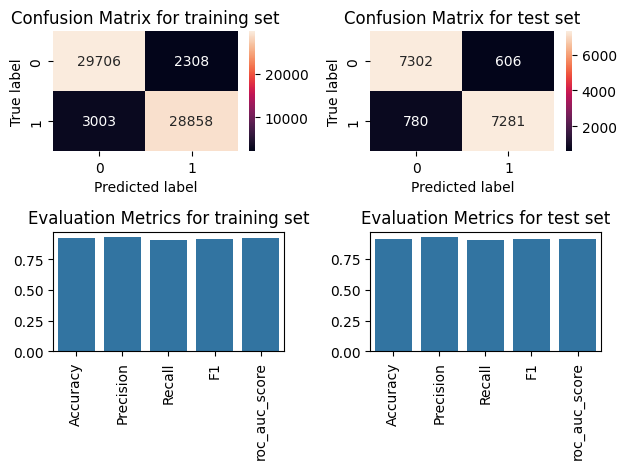

In [57]:
## Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression

## Fitting Logistic Regression model to training set using cross validation

# Defined param_dict
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Creating instance of Logistic Regression classifier
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(X_train, X_test, y_train, y_test, Logistic_regression, param_grid)

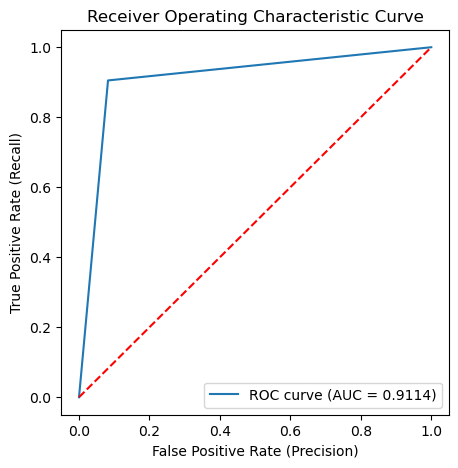

In [ ]:
# Plot roc curve for Logistic Regression for cross validation
y_pred=lr_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.913207 |           0.913207 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.924997 |           0.923165 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.901129 |           0.903238 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.912907 |           0.913093 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.913324 |           0.913303 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

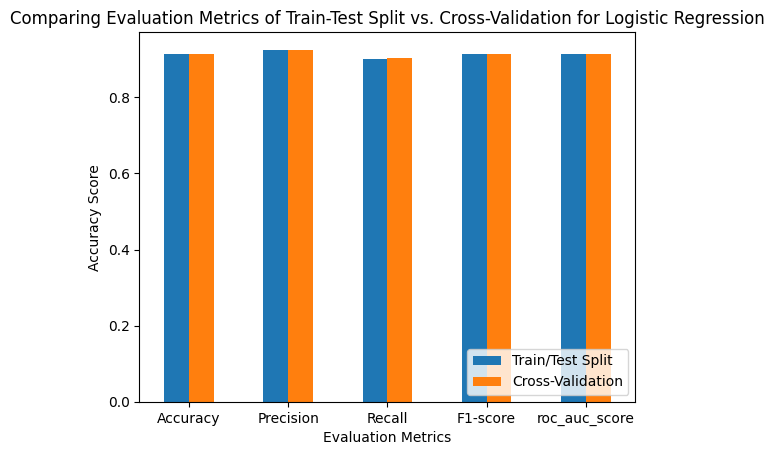

In [58]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Logistic Regression model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [lr['accuracy_test'],lr['precision_test'],lr['recall_test'],lr['f1_test'],lr['roc_auc_score_test']]
cross_validation = [lr_cv['accuracy_test'],lr_cv['precision_test'],lr_cv['recall_test'],lr_cv['f1_test'],lr_cv['roc_auc_score_test']]

# Create a dataframe
lr_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(lr_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=lr_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Logistic Regression")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We saw no improvement in the model after training with cross-validation.
- We got 0.91  % of accuracy in logistics regression model.

### **[2] Decision Tree**

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[25861  6153]
 [ 5106 26755]]
Accuracy:  0.82373385518591
Precision:  0.8130241886471374
Recall:  0.8397413766046263
F1 Score:  0.8261668390742485
roc_auc_score:  0.8237721064318814

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6317 1591]
 [1289 6772]]
Accuracy:  0.8196505729851588
Precision:  0.8097572641396628
Recall:  0.8400942811065625
F1 Score:  0.8246468582562104
roc_auc_score:  0.8194528057024972


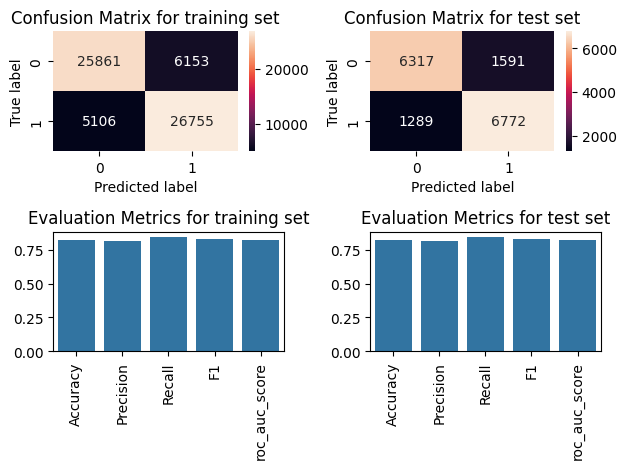

In [59]:
# Import Decision Tree algoritham in envirnoment
from sklearn.tree import DecisionTreeClassifier
# Fitting Decision Tree model to training set
classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt=classification_model(X_train, X_test, y_train, y_test, classifier_dt)

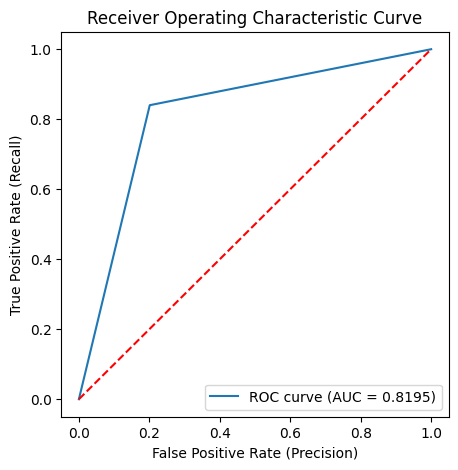

In [60]:
# Plot ROC curve for Decision Tree classifier
y_pred=dt['y_test_pred']
plot_roc_curve(y_test, y_pred)

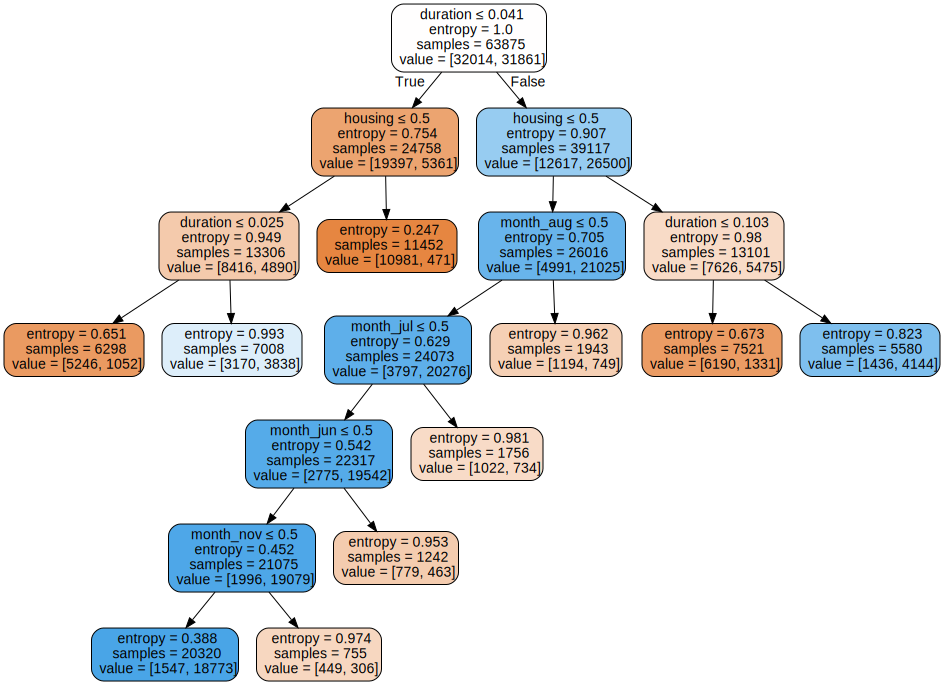

In [61]:
# Visulaizing Decision Tree

# Importing libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Visualizing graph
graph = Source(tree.export_graphviz(dt['model'], out_file=None,feature_names=df[independent_variables].columns,
                                    rounded=True,special_characters=True, filled = True))
display(SVG(graph.pipe(format='svg')))

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}
Best score: 0.8300118374341127
Training set evaluation result :

Confusion Matrix: 
 [[25861  6153]
 [ 5106 26755]]
Accuracy:  0.82373385518591
Precision:  0.8130241886471374
Recall:  0.8397413766046263
F1 Score:  0.8261668390742485
roc_auc_score:  0.8237721064318814

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6317 1591]
 [1289 6772]]
Accuracy:  0.8196505729851588
Precision:  0.809757264

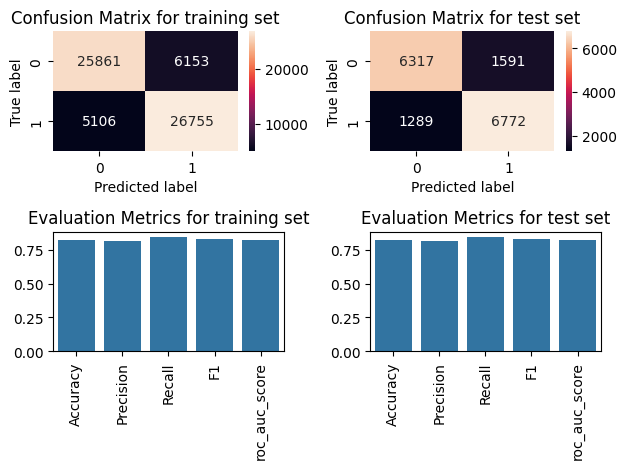

In [62]:
## Import Decision Tree algoritham in envirnoment
from sklearn.tree import DecisionTreeClassifier

## Fitting Decision Tree model to training set using cross validation

# Defining param_dict
param_grid = {'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Decision Tree classifier
classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
#Fitting model
dt_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_dt, param_grid)

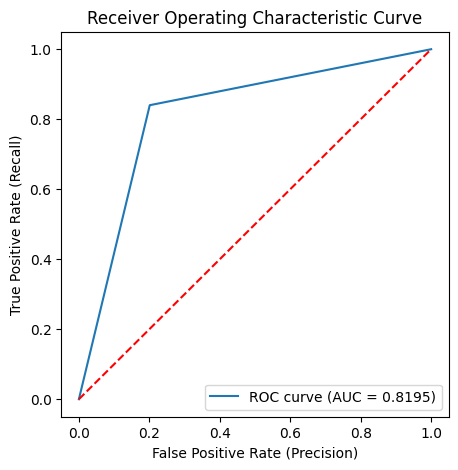

In [63]:
# Plot ROC curve for Decision Tree classifier
y_pred=dt_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

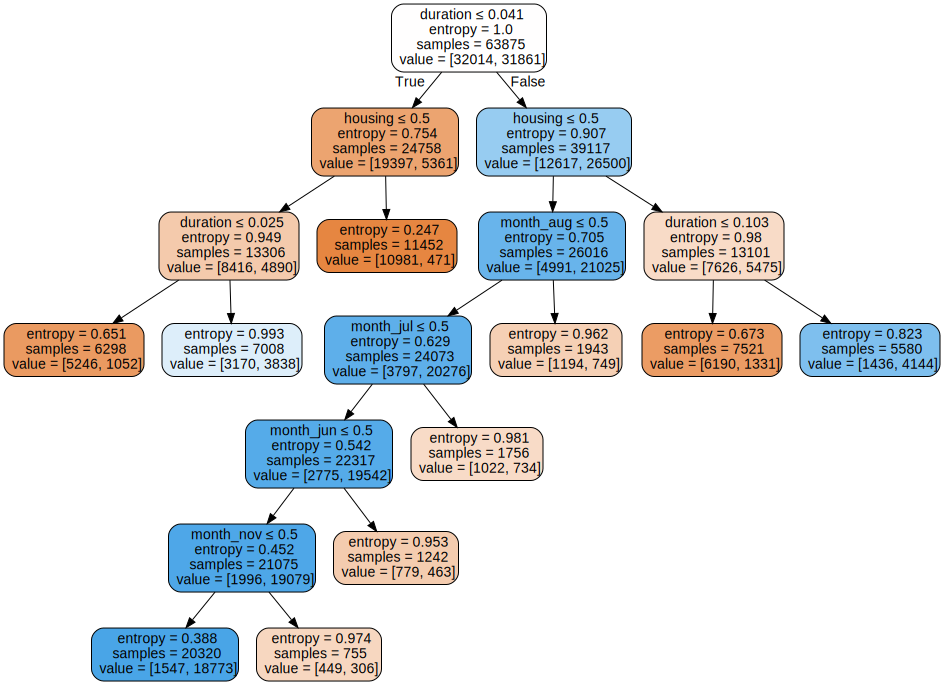

In [64]:
# Visulaizing Decision Tree

# Importing libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Visualizing graph
graph = Source(tree.export_graphviz(dt_cv['model'].best_estimator_, out_file=None,feature_names=df[independent_variables].columns,
                                    rounded=True,special_characters=True, filled = True))
display(SVG(graph.pipe(format='svg')))

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.819651 |           0.819651 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.809757 |           0.809757 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.840094 |           0.840094 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.824647 |           0.824647 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.819453 |           0.819453 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

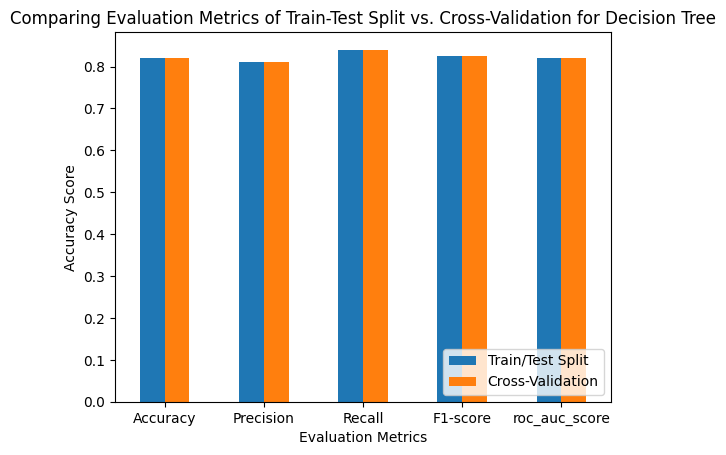

In [65]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Decision Tree model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [dt['accuracy_test'],dt['precision_test'],dt['recall_test'],dt['f1_test'],dt['roc_auc_score_test']]
cross_validation = [dt_cv['accuracy_test'],dt_cv['precision_test'],dt_cv['recall_test'],dt_cv['f1_test'],dt_cv['roc_auc_score_test']]

# Create a dataframe
dt_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(dt_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=dt_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Decision Tree")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- No improvement seen in the model after training with cross-validation.
- We got 0.82  % of accuracy in Decision Tree model.

### **[3] Random Forest**

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[28661  3353]
 [ 4141 27720]]
Accuracy:  0.8826771037181996
Precision:  0.8920928136967785
Recall:  0.8700291892909827
F1 Score:  0.8809228715797501
roc_auc_score:  0.882646880520421

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7044  864]
 [1079 6982]]
Accuracy:  0.8783267580938068
Precision:  0.8898801937292888
Recall:  0.8661456394988215
F1 Score:  0.877852517759477
roc_auc_score:  0.8784445951667097


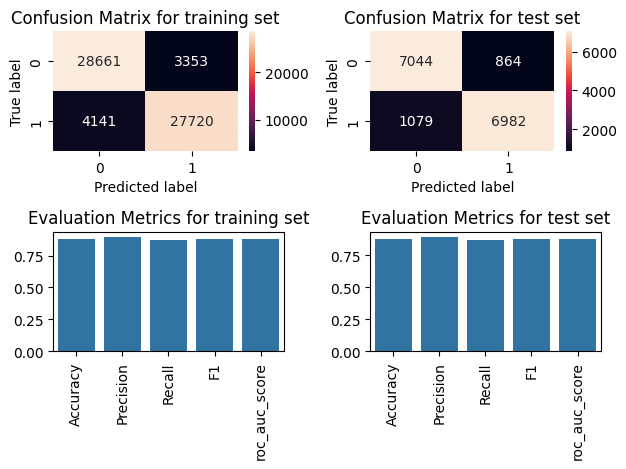

In [66]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest model to training set
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
rf=classification_model(X_train, X_test, y_train, y_test, classifier_rf)

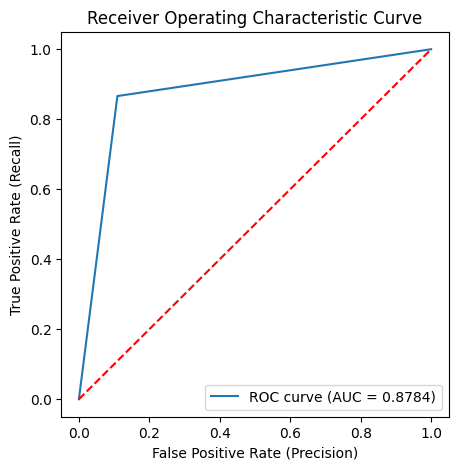

In [67]:
# Plot ROC curve for Random Forest classifier
y_pred=rf['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}
Best score: 0.8825518918857567
Training set evaluation result :

Confusion Matrix: 
 [[28655  3359]
 [ 4133 27728]]
Accuracy:  0.8827084148727984
Precision:  0.8919484028693666
Recall:  0.8702802799661028
F1 Score:  0.8809811272796594
roc_auc_score:  0.8826787168556697

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 

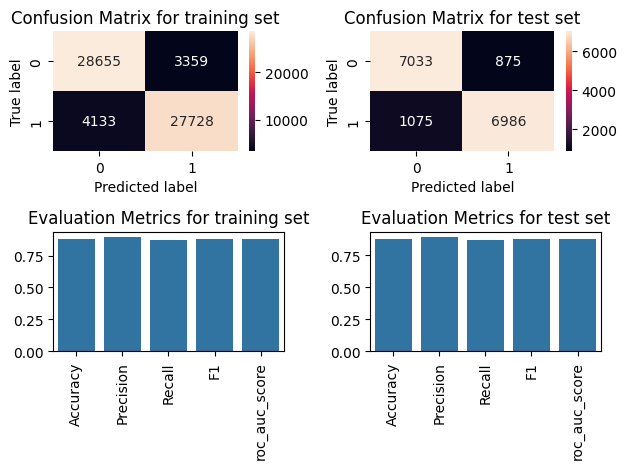

In [68]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier

## Fitting Random Forest model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Random Forest classifier
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
# Fitting model
rf_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_rf, param_grid)

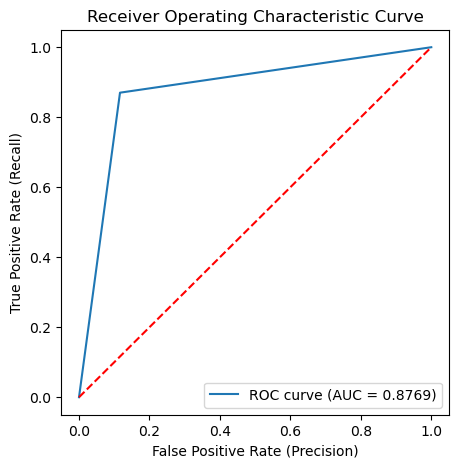

In [ ]:
# Plot ROC curve for Random Forest classifier
y_pred=rf_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.875008 |           0.876824 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.892151 |           0.884043 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.855849 |           0.870115 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.873623 |           0.877024 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.875193 |           0.876889 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

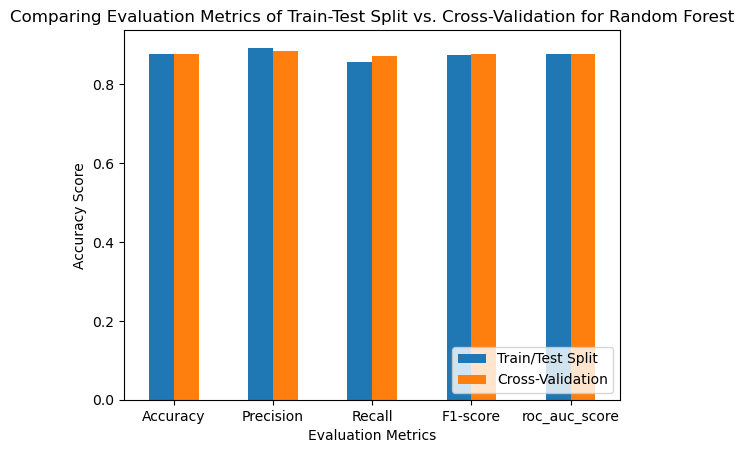

In [ ]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Random Forest model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [rf['accuracy_test'],rf['precision_test'],rf['recall_test'],rf['f1_test'],rf['roc_auc_score_test']]
cross_validation = [rf_cv['accuracy_test'],rf_cv['precision_test'],rf_cv['recall_test'],rf_cv['f1_test'],rf_cv['roc_auc_score_test']]

# Create a dataframe
rf_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(rf_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=rf_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Random Forest")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We saw slightly improvement in the model after training with cross-validation.
- Mejor improvement seen in reacall.
- We got 0.86 % of accuracy using train_test_split and 0.87 % of accuracy using cross validation in Random Forest model.

.

### **[4] Gradient Boosting Machine**

GradientBoostingClassifier(max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[29353  2661]
 [ 2196 29665]]
Accuracy:  0.9239608610567515
Precision:  0.9176823609478438
Recall:  0.9310756096795455
F1 Score:  0.9243304719024101
roc_auc_score:  0.9239778623146273

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7213  695]
 [ 589 7472]]
Accuracy:  0.9195942137892166
Precision:  0.914901432594588
Recall:  0.9269321424140925
F1 Score:  0.9208774956864678
roc_auc_score:  0.9195232285161002


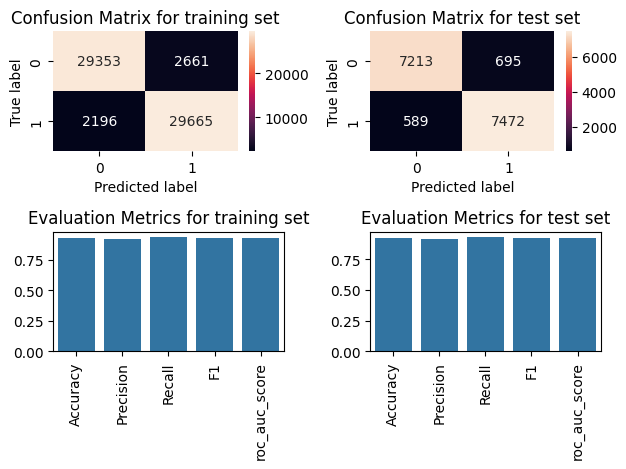

In [69]:
# Import Gradient Boosting Machine algoritham in envirnoment
from sklearn.ensemble import GradientBoostingClassifier
# Fitting Gradient Boosting Machine model to training set
classifier_gbm = GradientBoostingClassifier(max_leaf_nodes=10, random_state=0)
gbm=classification_model(X_train, X_test, y_train, y_test, classifier_gbm)

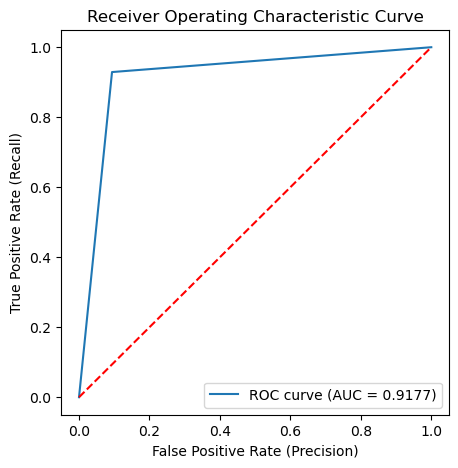

In [ ]:
# Plot ROC curve for Gradient Boosting Machine classifier
y_pred=gbm['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_leaf_nodes=10,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}
Best score: 0.9254325071003265
Training set evaluation result :

Confusion Matrix: 
 [[29513  2501]
 [ 2187 29674]]
Accuracy:  0.9266066536203522
Precision:  0.9222688422688423
Recall:  0.9313580866890556
F1 Score:  0.9267911799612719
roc_auc_score:  0.9266180075476889

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7261  647]
 [ 583 7478]]
Accuracy:  0.9229757655457449
Pr

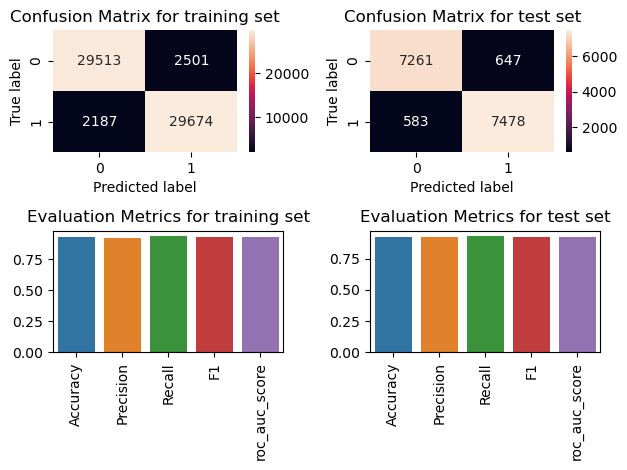

In [ ]:
# Import Gradient Boosting Machine algoritham in envirnoment
from sklearn.ensemble import GradientBoostingClassifier

## Fitting Gradient Boosting Machine model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Gradient Boosting Machine classifier
classifier_gbm = GradientBoostingClassifier(max_leaf_nodes=10, random_state=0)
# Fitting model
gbm_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_gbm, param_grid)

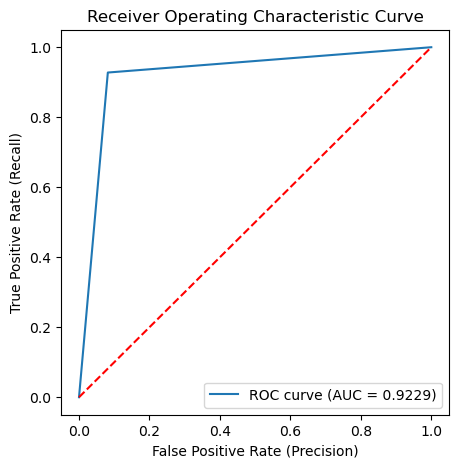

In [ ]:
# Plot ROC curve for Gradient Boosting Machine classifier
y_pred=gbm_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.917778 |           0.922976 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.909964 |           0.920369 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.929041 |           0.927676 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.919403 |           0.924008 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.917669 |           0.92293  |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

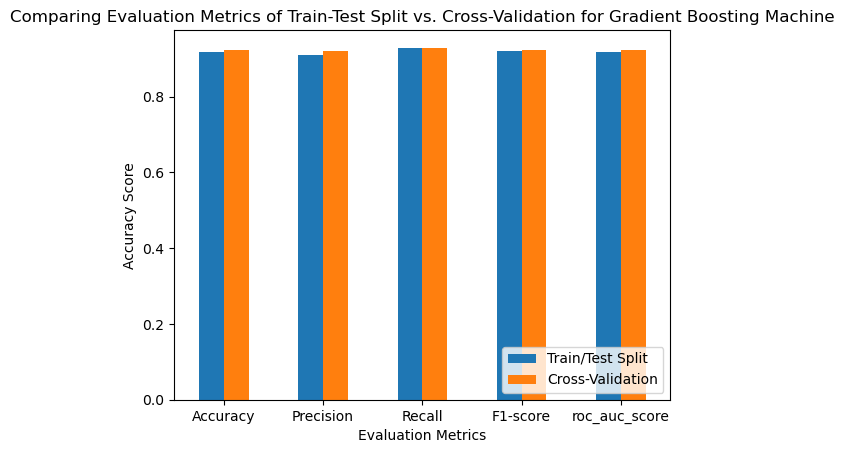

In [ ]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Gradient Boosting Machine model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [gbm['accuracy_test'],gbm['precision_test'],gbm['recall_test'],gbm['f1_test'],gbm['roc_auc_score_test']]
cross_validation = [gbm_cv['accuracy_test'],gbm_cv['precision_test'],gbm_cv['recall_test'],gbm_cv['f1_test'],gbm_cv['roc_auc_score_test']]

# Create a dataframe
gbm_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(gbm_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=gbm_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Gradient Boosting Machine")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- Got slightly improvement in the model after training with cross-validation.
- All evaluation metrics improved except for recall.
- We got 0.91% of accuracy using train_test_split and 0.92 % of accuracy using cross validation in Gradient Boosting Machine model.

### **[5] XGBoost**

GradientBoostingClassifier(max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[29205  2809]
 [ 2147 29714]]
Accuracy:  0.9224109589041096
Precision:  0.9136303539033914
Recall:  0.9326135400646558
F1 Score:  0.9230243538767395
roc_auc_score:  0.9224353387834993

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7167  741]
 [ 572 7489]]
Accuracy:  0.9177781952533033
Precision:  0.9099635479951398
Recall:  0.9290410619029897
F1 Score:  0.9194033515437973
roc_auc_score:  0.9176692411184144


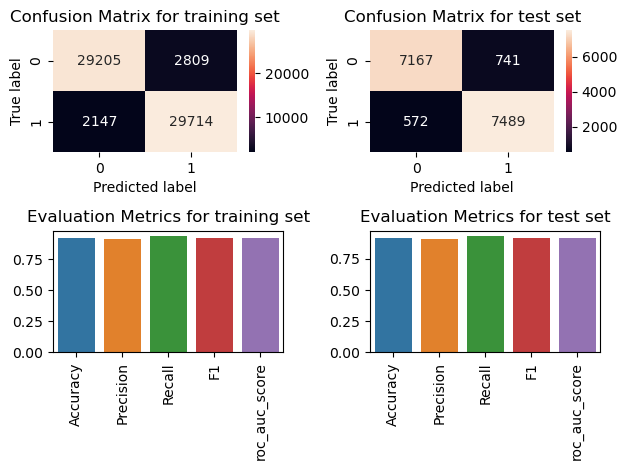

In [ ]:
# Import XGBoost algoritham in envirnoment
from xgboost import XGBClassifier
# Fitting XGBoost model to training set
classifier_xgb = XGBClassifier(max_leaf_nodes=10, random_state=0)
xgb=classification_model(X_train, X_test, y_train, y_test, classifier_gbm)

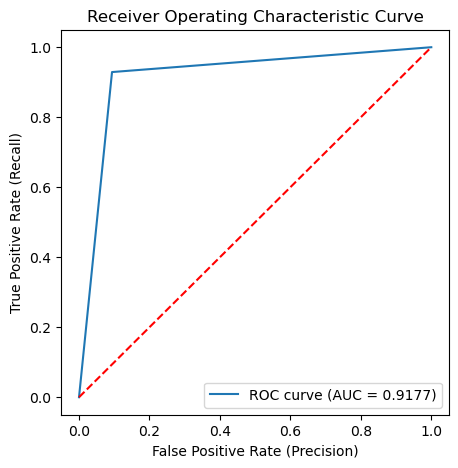

In [ ]:
# Plot ROC curve for XGBoost classifier
y_pred=xgb['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[20:11:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } are not used.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,


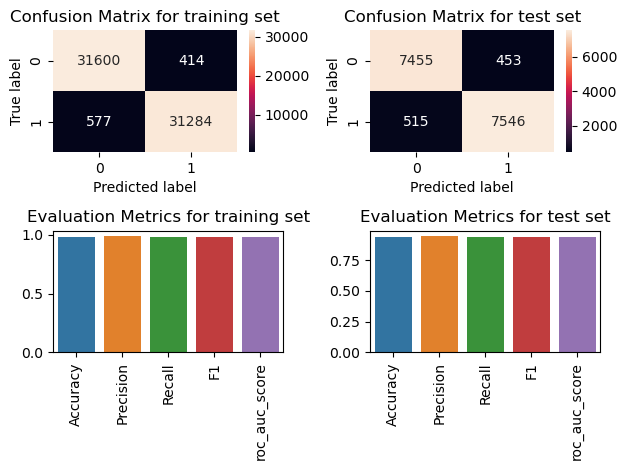

In [ ]:
# Import XGBoost algoritham in envirnoment
from xgboost import XGBClassifier

## Fitting XGBoost model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of XGBoost classifier
classifier_xgb = XGBClassifier(max_leaf_nodes=10, random_state=0)
# Fitting model
xgb_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_xgb, param_grid)

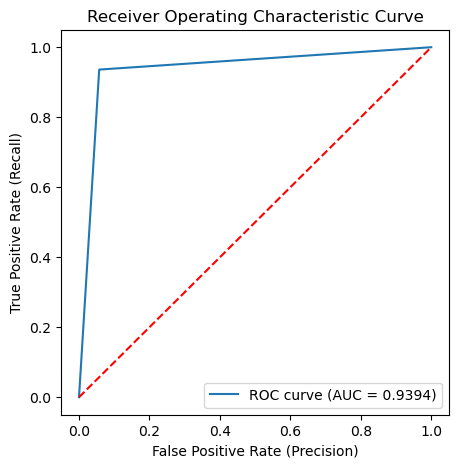

In [ ]:
# Plot ROC curve for XGBoost classifier
y_pred=xgb_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.917778 |           0.939383 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.909964 |           0.943368 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.929041 |           0.936112 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.919403 |           0.939726 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.917669 |           0.939414 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

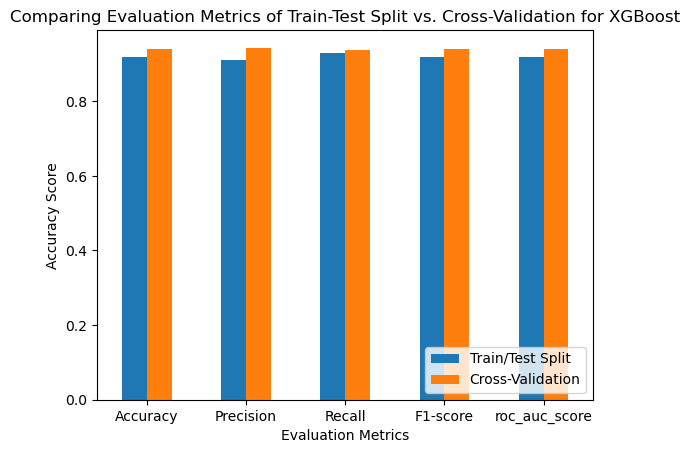

In [ ]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of XGBoost model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [xgb['accuracy_test'],xgb['precision_test'],xgb['recall_test'],xgb['f1_test'],xgb['roc_auc_score_test']]
cross_validation = [xgb_cv['accuracy_test'],xgb_cv['precision_test'],xgb_cv['recall_test'],xgb_cv['f1_test'],xgb_cv['roc_auc_score_test']]

# Create a dataframe
xgb_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(xgb_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=xgb_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for XGBoost")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We found improvement in the model after training model using cross-validation.
- More accuracy seen in model trained using cross validation.
- We got 0.91 % of accuracy using train_test_split and 0.93 % of accuracy using cross validation in XGBoost model.
- Major improvement found in precision which is 0.94 from 0.90.

### **[6] K-Nearest Neighbor(KNN)**

KNeighborsClassifier()
Training set evaluation result :

Confusion Matrix: 
 [[30390  1624]
 [ 2205 29656]]
Accuracy:  0.940054794520548
Precision:  0.9480818414322251
Recall:  0.9307931326700355
F1 Score:  0.9393579449169319
roc_auc_score:  0.940032663042708

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7321  587]
 [ 765 7296]]
Accuracy:  0.9153359634291439
Precision:  0.9255359634656857
Recall:  0.9050986229996278
F1 Score:  0.9152032112393377
roc_auc_score:  0.9154349968817056


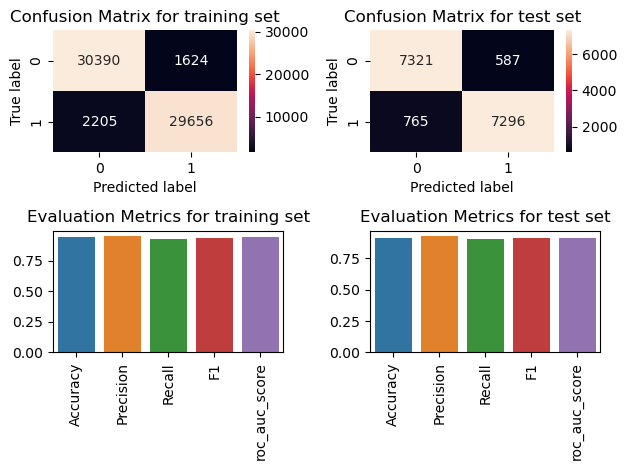

In [ ]:
# Import KNN algoritham in envirnoment
from sklearn.neighbors import KNeighborsClassifier
# Fitting XGBoost model to training set
classifier_knn = KNeighborsClassifier(n_neighbors=5)
knn=classification_model(X_train, X_test, y_train, y_test, classifier_knn)

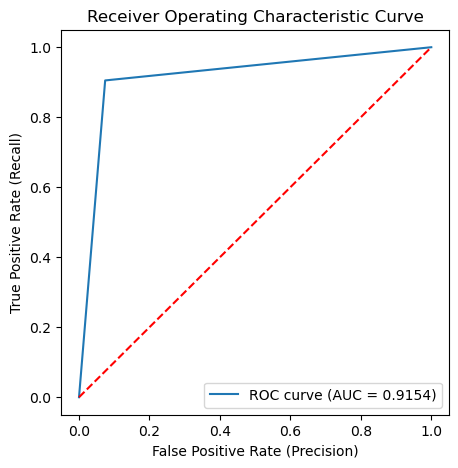

In [ ]:
# Plot ROC curve for KNN classifier
y_pred=knn['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6])},
             scoring='accuracy', verbose=1)
Best parameters: {'metric': 'cityblock', 'n_neighbors': 5}
Best score: 0.9213776834107793
Training set evaluation result :

Confusion Matrix: 
 [[30432  1582]
 [ 2021 29840]]
Accuracy:  0.9435929549902152
Precision:  0.9496531092864872
Recall:  0.9365682181977967
F1 Score:  0.9430652781947759
roc_auc_score:  0.9435761688227691

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7338  570]
 [ 708 7353]]
Accuracy:  0.9199699417621642
Precision:  0.9280575539568345
Recall:  0.9121697059918125
F1 Score:  0.920045045045045
roc_auc_score:  0.9200453992781521


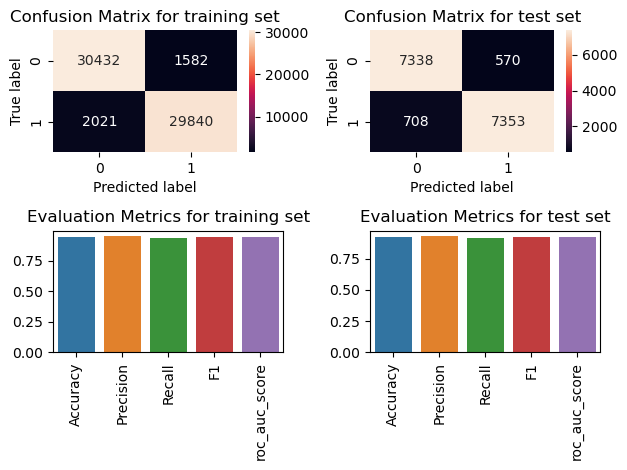

In [ ]:
## Import KNN algoritham in envirnoment
from sklearn.neighbors import KNeighborsClassifier

## Fitting KNN model to training set using cross validation

# Defining param_dict
param_grid = {"n_neighbors": np.arange(1,7), "metric": ["euclidean", "cityblock"]}
# Creating instance of KNN classifier
classifier_knn = KNeighborsClassifier()
# Fitting model
knn_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_knn, param_grid)

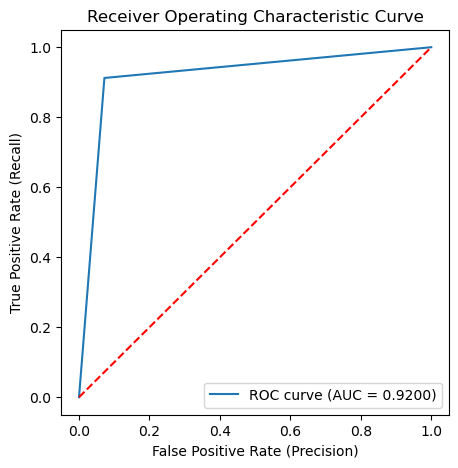

In [ ]:
# Plot ROC curve for KNN classifier
y_pred=knn_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.915336 |           0.91997  |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.925536 |           0.928058 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.905099 |           0.91217  |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.915203 |           0.920045 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.915435 |           0.920045 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

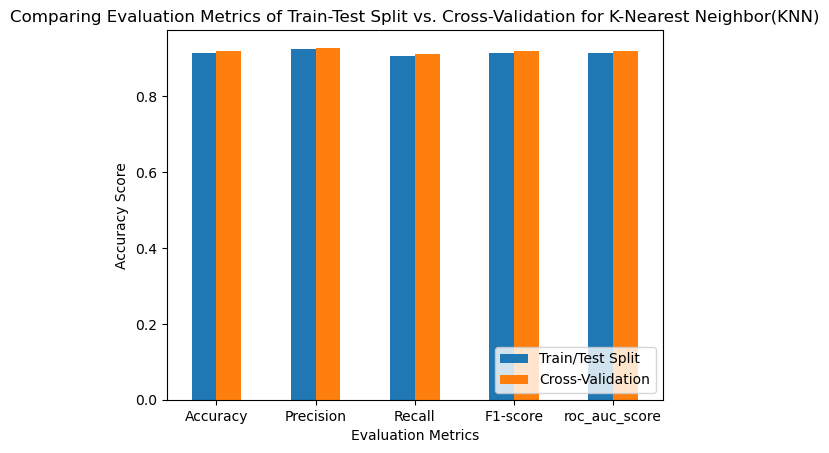

In [ ]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of K-Nearest Neighbor(KNN)

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [knn['accuracy_test'],knn['precision_test'],knn['recall_test'],knn['f1_test'],knn['roc_auc_score_test']]
cross_validation = [knn_cv['accuracy_test'],knn_cv['precision_test'],knn_cv['recall_test'],knn_cv['f1_test'],knn_cv['roc_auc_score_test']]

# Create a dataframe
knn_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(knn_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=knn_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for K-Nearest Neighbor(KNN)")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We found slightly improvement in the model after training model using cross-validation.
- We got improvement in F1-score and recall using cross validation.
- We got improved deree of roc_auc_score in the model using cross validation over train_test_split to 0.92 from 0.91.

### **[7] Naive Bayes**

GaussianNB()
Training set evaluation result :

Confusion Matrix: 
 [[27030  4984]
 [ 4201 27660]]
Accuracy:  0.8562035225048924
Precision:  0.8473226320303884
Recall:  0.8681460092275823
F1 Score:  0.8576079373691962
roc_auc_score:  0.8562320600270479

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6646 1262]
 [1047 7014]]
Accuracy:  0.8554073517440041
Precision:  0.847510874818753
Recall:  0.8701153703014515
F1 Score:  0.8586643814653854
roc_auc_score:  0.8552650700773823


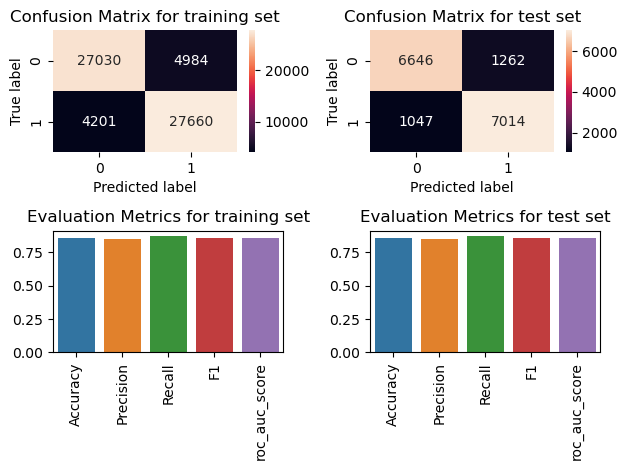

In [ ]:
# Import Naive Bayes algoritham in envirnoment
from sklearn.naive_bayes import GaussianNB
# Fitting Naive Bayes model to training set
classifier_nb = GaussianNB()
nb=classification_model(X_train, X_test, y_train, y_test, classifier_nb)

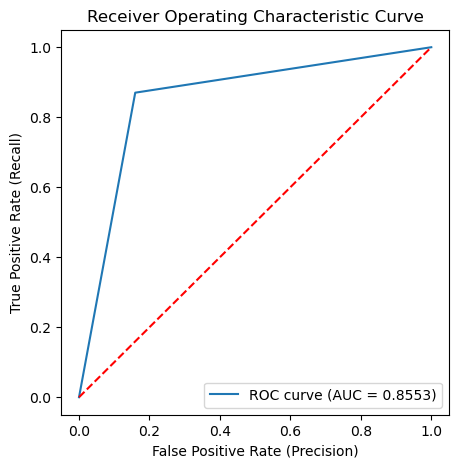

In [ ]:
# Plot ROC curve for Naive Bayes classifier
y_pred=nb['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

Fitting 3 folds for each of 6 candidates, totalling 18 fits
GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.1, 0.1]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             scoring='accuracy', verbose=1)
Best parameters: {'priors': None, 'var_smoothing': 1e-09}
Best score: 0.8565792303090737
Training set evaluation result :

Confusion Matrix: 
 [[27030  4984]
 [ 4201 27660]]
Accuracy:  0.8562035225048924
Precision:  0.8473226320303884
Recall:  0.8681460092275823
F1 Score:  0.8576079373691962
roc_auc_score:  0.8562320600270479

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6646 1262]
 [1047 7014]]
Accuracy:  0.8554073517440041
Precision:  0.847510874818753
Recall:  0.8701153703014515
F1 Score:  0.8586643814653854
roc_auc_score:  0.8552650700773823


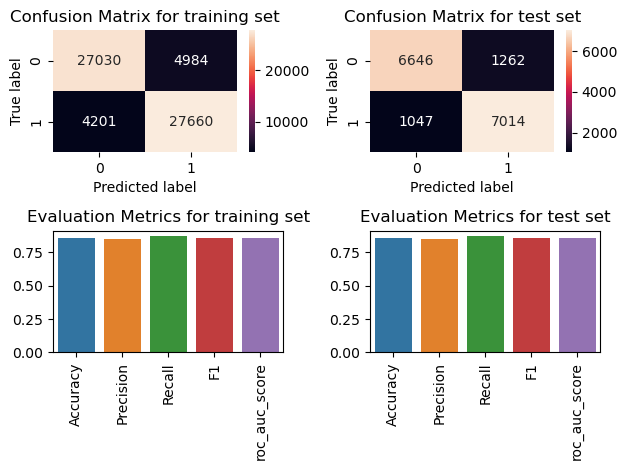

In [ ]:
# Import Naive Bayes algoritham in envirnoment
from sklearn.naive_bayes import GaussianNB

## Fitting Naive Bayes model to training set using cross validation

# Defining param_dict
n_classes = np.unique(df['y'])
param_grid = {'priors': [None, [0.1,]* len(n_classes),],'var_smoothing': [1e-9, 1e-6, 1e-12],}
# Creating instance of Naive Bayes classifier
classifier_nb = GaussianNB()
# Fitting model
nb_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_nb, param_grid)

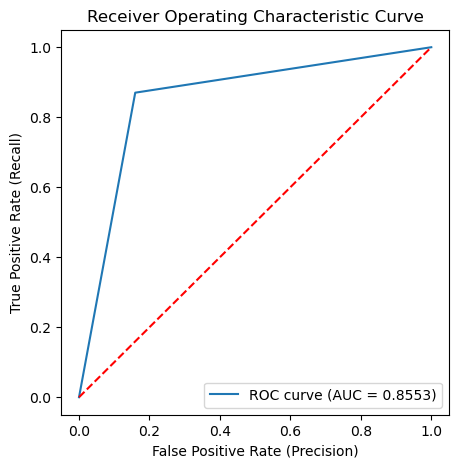

In [ ]:
# Plot ROC curve for Naive Bayes classifier
y_pred=nb_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split and Cross-Validation</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.855407 |           0.855407 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.847511 |           0.847511 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.870115 |           0.870115 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.858664 |           0.858664 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.855265 |           0.855265 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

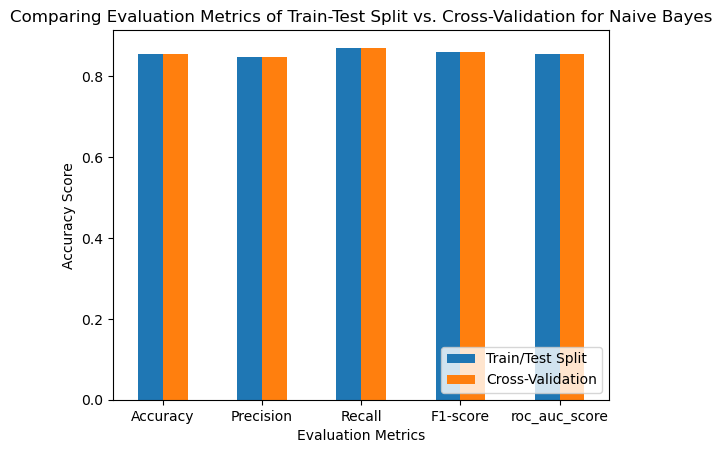

In [ ]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Naive Bayes

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [nb['accuracy_test'],nb['precision_test'],nb['recall_test'],nb['f1_test'],nb['roc_auc_score_test']]
cross_validation = [nb_cv['accuracy_test'],nb_cv['precision_test'],nb_cv['recall_test'],nb_cv['f1_test'],nb_cv['roc_auc_score_test']]

# Create a dataframe
nb_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(nb_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=nb_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Naive Bayes")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We not found any improvement in the model after training model using cross-validation.
- We got 0.85 % of accuracy using train_test_split and 0.85 % of accuracy using cross validation in Naive Baye model.

.

### **[8] Support Vector Machine**

SVC(kernel='linear')
Training set evaluation result :

Confusion Matrix: 
 [[29626  2388]
 [ 3023 28838]]
Accuracy:  0.9152876712328767
Precision:  0.9235252674053673
Recall:  0.9051191111390101
F1 Score:  0.9142295560099546
roc_auc_score:  0.9152633726495326

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7283  625]
 [ 793 7268]]
Accuracy:  0.9112029557267205
Precision:  0.9208159128341569
Recall:  0.9016251085473266
F1 Score:  0.9111194684718565
roc_auc_score:  0.9112956094077047


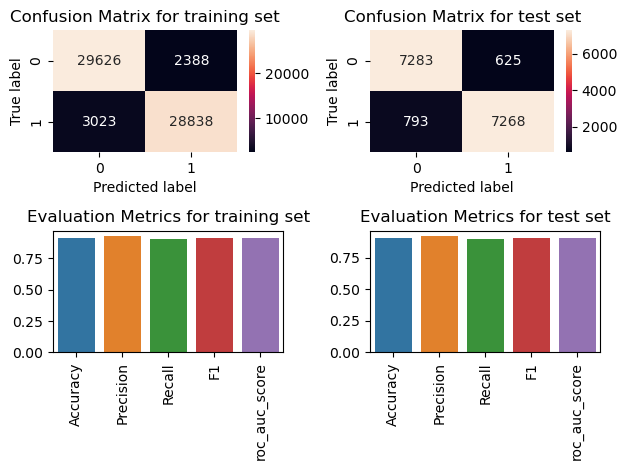

In [ ]:
# Import Support Vector Machine algoritham in envirnoment
from sklearn.svm import SVC
# Fitting Support Vector Machine algoritham to training set
classifier_svm = SVC(kernel='linear')
svm=classification_model(X_train, X_test, y_train, y_test, classifier_svm)

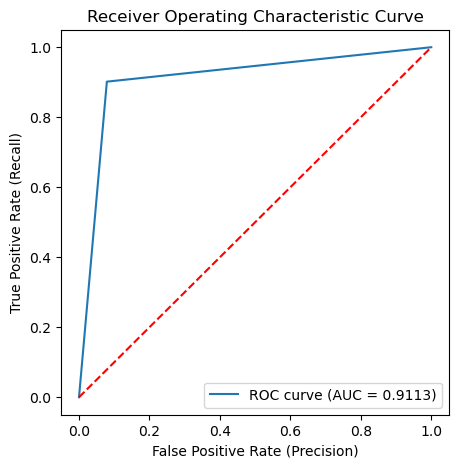

In [ ]:
# Plot ROC curve for Support Vector Machine classifier
y_pred=svm['y_test_pred']
plot_roc_curve(y_test, y_pred)

.

#### **<u>Cross- Validation & Hyperparameter Tuning</u>**

***Note :- Support Vector Machines algoritham take a long time to train using cross validation, so it's better to skip it. We write only raw training Python code for model Support Vector Machines using cross validation, but we will not run it.***

***Note :- Support Vector Machines algoritham take a long time to train using cross validation, so it's better to skip it. We write only raw training Python code for model Support Vector Machines using cross validation, but we will not run it.***

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split</u>**

+----+----------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |
+====+======================+====================+
|  0 | Accuracy             |           0.911203 |
+----+----------------------+--------------------+
|  1 | Precision            |           0.920816 |
+----+----------------------+--------------------+
|  2 | Recall               |           0.901625 |
+----+----------------------+--------------------+
|  3 | F1-score             |           0.911119 |
+----+----------------------+--------------------+
|  4 | roc_auc_score        |           0.911296 |
+----+----------------------+--------------------+




<Figure size 700x700 with 0 Axes>

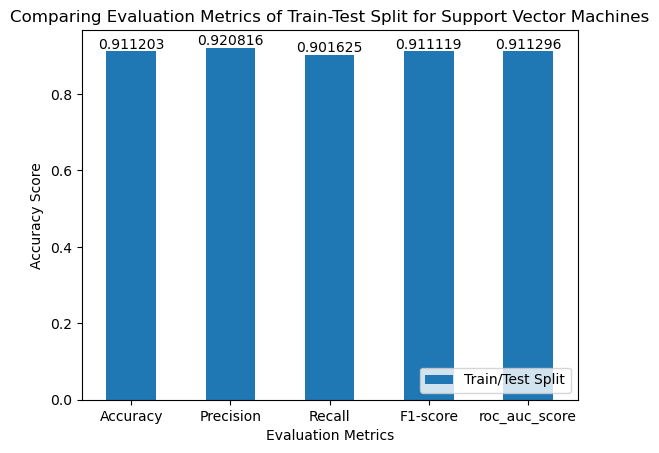

In [ ]:
# Comparing evaluation metrics of train_test_split of Support Vector Machines

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [svm['accuracy_test'],svm['precision_test'],svm['recall_test'],svm['f1_test'],svm['roc_auc_score_test']]

# Create a dataframe
svm_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split})
# Print dataframe
print('=='*45)
print(tabulate(svm_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=svm_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split for Support Vector Machines")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.bar_label(ax.containers[0])
ax.legend(loc="lower right")

# Show the plot
plt.show()

print('=='*45)

**<u>Observations</u> :**
- SVM take long time to train using cross validation, so we not performed cross validation in SVM model, we skipped it.
- We got 0.91 % of accuracy using train_test_split in Support Vector Machines model.

.

### **[9] Artificial Neural Networks - ANNs**

In [ ]:
# Installing keras in envirnoiment
!pip install keras

In [ ]:
# Installing tensorflow in envirnoiment
!pip install tensorflow

In [ ]:
## Build Artificial Neural Network

# Importing necessary dependancy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# Initialize the Artificial Neural Network
classifier = Sequential()

# Add the input layer and the first hidden layer
classifier.add(Dense(units = 51, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_dim = 34))

# Add the second hidden layer
classifier.add(Dense(units = 51,kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))

# Add the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the ANN
adam = Adam(lr=0.001)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
6388/6388 [==============================] - 17s 2ms/step - loss: 0.2373 - accuracy: 0.9094
Epoch 2/20
6388/6388 [==============================] - 16s 2ms/step - loss: 0.2130 - accuracy: 0.9159
Epoch 3/20
6388/6388 [==============================] - 17s 3ms/step - loss: 0.2051 - accuracy: 0.9178
Epoch 4/20
6388/6388 [==============================] - 18s 3ms/step - loss: 0.2007 - accuracy: 0.9195
Epoch 5/20
6388/6388 [==============================] - 17s 3ms/step - loss: 0.1990 - accuracy: 0.9189
Epoch 6/20
6388/6388 [==============================] - 16s 3ms/step - loss: 0.1973 - accuracy: 0.9197
Epoch 7/20
6388/6388 [==============================] - 16s 3ms/step - loss: 0.1966 - accuracy: 0.9207
Epoch 8/20
6388/6388 [==============================] - 17s 3ms/step - loss: 0.1960 - accuracy: 0.9204
Epoch 9/20
6388/6388 [==============================] - 17s 3ms/step - loss: 0.1959 - accuracy: 0.9207
Epoch 10/20
6388/6388 [==============================] - 17s 3ms/step - l

500/500 [==============================] - 1s 3ms/step
__________________________________________________________________________________________
Training set evaluation result for ANN :

Confusion Matrix: 
 [[28869  3145]
 [ 1970 29891]]
Accuracy:  0.919921722113503
Precision:  0.9048008233442305
Recall:  0.938168921251687
F1 Score:  0.9211827973558101
roc_auc_score:  0.9199653252475716

-------------------------------

Test set evaluation result for ANN :

Confusion Matrix: 
 [[7089  819]
 [ 522 7539]]
Accuracy:  0.9160247980462145
Precision:  0.9020100502512562
Recall:  0.935243766282099
F1 Score:  0.9183263292526951
roc_auc_score:  0.9158388785886974


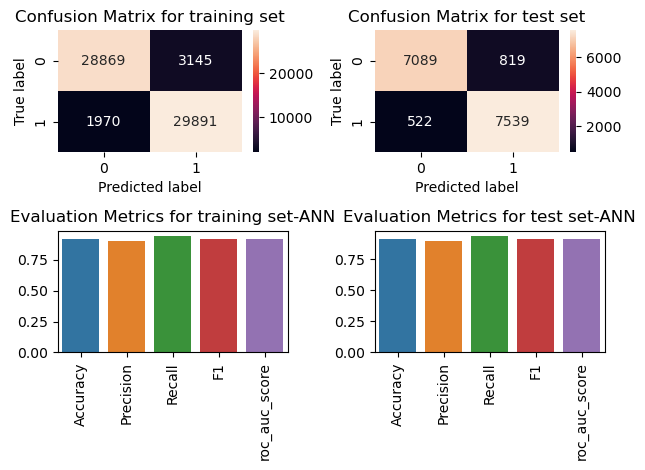

In [ ]:
## Make predictions
y_train_predict = classifier.predict(X_train)
y_train_pred = (y_train_predict > 0.5)

y_test_predict = classifier.predict(X_test)
y_test_pred = (y_test_predict > 0.5)
print('__'*45)

## Evaluate the model
print('Training set evaluation result for ANN :\n')
cm_train_ann = confusion_matrix(y_train, y_train_pred)
accuracy_train_ann = accuracy_score(y_train, y_train_pred)
precision_train_ann = precision_score(y_train, y_train_pred)
recall_train_ann = recall_score(y_train, y_train_pred)
f1_train_ann = f1_score(y_train, y_train_pred)
roc_auc_score_train_ann = roc_auc_score(y_train, y_train_pred)
print("Confusion Matrix: \n", cm_train_ann)
print("Accuracy: ", accuracy_train_ann)
print("Precision: ", precision_train_ann)
print("Recall: ", recall_train_ann)
print("F1 Score: ", f1_train_ann)
print("roc_auc_score: ", roc_auc_score_train_ann)
print('\n-------------------------------\n')
print('Test set evaluation result for ANN :\n')
cm_test_ann = confusion_matrix(y_test, y_test_pred)
accuracy_test_ann = accuracy_score(y_test, y_test_pred)
precision_test_ann = precision_score(y_test, y_test_pred)
recall_test_ann = recall_score(y_test, y_test_pred)
f1_test_ann = f1_score(y_test, y_test_pred)
roc_auc_score_test_ann=roc_auc_score(y_test, y_test_pred)
print("Confusion Matrix: \n", cm_test_ann)
print("Accuracy: ", accuracy_test_ann)
print("Precision: ", precision_test_ann)
print("Recall: ", recall_test_ann)
print("F1 Score: ", f1_test_ann)
print("roc_auc_score: ", roc_auc_score_test_ann)
print('=='*45)

## Visualizes evaluation metrics
fig,axes = plt.subplots(nrows=2, ncols=2)
ax1 = sns.heatmap(cm_train_ann, annot=True, ax=axes[0,0], fmt='d')
ax1.set_title('Confusion Matrix for training set')
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')
ax2 = sns.heatmap(cm_test_ann, annot=True, ax=axes[0,1], fmt='d')
ax2.set_title('Confusion Matrix for test set')
ax2.set_ylabel('True label')
ax2.set_xlabel('Predicted label')
ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train_ann, precision_train_ann, recall_train_ann, f1_train_ann, roc_auc_score_train_ann], ax=axes[1,0])
ax3.set_title('Evaluation Metrics for training set-ANN')
ax3.tick_params(axis='x', rotation=90)
ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test_ann, precision_test_ann, recall_test_ann, f1_test_ann, roc_auc_score_test_ann], ax=axes[1,1])
ax4.set_title('Evaluation Metrics for test set-ANN')
ax4.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
print('=='*45)

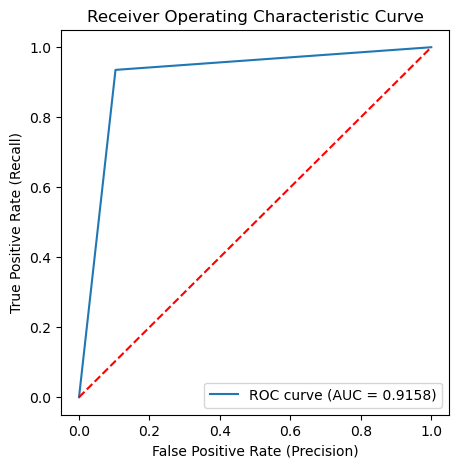

In [ ]:
# Plot ROC curve for ANN
plot_roc_curve(y_test, y_test_pred)

.

#### **<u>Comparing Evaluation Metrics of Train/Test Split</u>**

+----+----------------------+----------+
|    | Evaluation Metrics   |   Result |
+====+======================+==========+
|  0 | Accuracy             | 0.916025 |
+----+----------------------+----------+
|  1 | Precision            | 0.90201  |
+----+----------------------+----------+
|  2 | Recall               | 0.935244 |
+----+----------------------+----------+
|  3 | F1-score             | 0.918326 |
+----+----------------------+----------+
|  4 | roc_auc_score        | 0.915839 |
+----+----------------------+----------+




<Figure size 700x700 with 0 Axes>

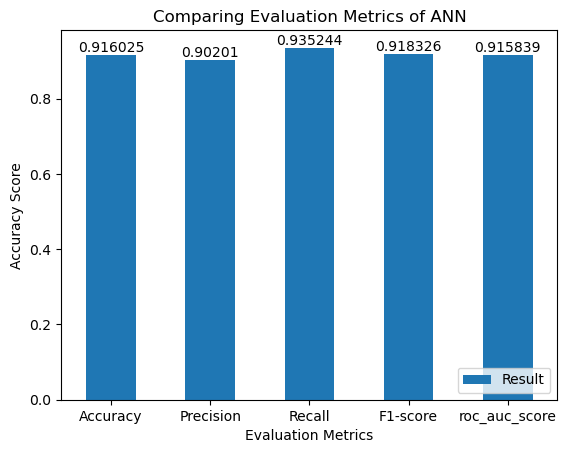

In [ ]:
# Comparing evaluation metrics of train_test_split of ANN

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
ev_result = [accuracy_test_ann, precision_test_ann, recall_test_ann, f1_test_ann, roc_auc_score_test_ann]

# Create a dataframe
ann_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
# Print dataframe
print('=='*45)
print(tabulate(ann_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=ann_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of ANN")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.bar_label(ax.containers[0])
ax.legend(loc="lower right")

# Show the plot
plt.show()

print('=='*45)

**<u>Observations</u> :**
- We got 0.91 % accuracy and 0.91 F1-score in Artificial Neural Networks.

.

## **<u>Comparing Different Models based on the Evaluation Metrics</u>**

In [ ]:
## Creating dataframe of performance of all models

# Data
model=['Logistic_Regression','Decision_Tree','Random_Forest','Gradient_Boosting_Machine','XGBoost','K_Nearest_Neighbor','Naive_Bayes','Support_Vector_Machine','ANN']
Accuracy=[lr_cv['accuracy_test'],dt_cv['accuracy_test'],rf_cv['accuracy_test'],gbm_cv['accuracy_test'],xgb_cv['accuracy_test'],knn_cv['accuracy_test'],nb_cv['accuracy_test'],svm['accuracy_test'], accuracy_test_ann]
Precision=[lr_cv['precision_test'],dt_cv['precision_test'],rf_cv['precision_test'],gbm_cv['precision_test'],xgb_cv['precision_test'],knn_cv['precision_test'],nb_cv['precision_test'],svm['precision_test'], precision_test_ann]
Recall=[lr_cv['recall_test'],dt_cv['recall_test'],rf_cv['recall_test'],gbm_cv['recall_test'],xgb_cv['recall_test'],knn_cv['recall_test'],nb_cv['recall_test'],svm['recall_test'], recall_test_ann]
F1_score=[lr_cv['f1_test'],dt_cv['f1_test'],rf_cv['f1_test'],gbm_cv['f1_test'],xgb_cv['f1_test'],knn_cv['f1_test'],nb_cv['f1_test'],svm['f1_test'], f1_test_ann]
roc_auc_score=[lr_cv['roc_auc_score_test'],dt_cv['roc_auc_score_test'],rf_cv['roc_auc_score_test'],gbm_cv['roc_auc_score_test'],xgb_cv['roc_auc_score_test'],knn_cv['roc_auc_score_test'],nb_cv['roc_auc_score_test'],svm['roc_auc_score_test'], roc_auc_score_test_ann]
confusion_matrix=[lr_cv['cm_test'],dt_cv['cm_test'],rf_cv['cm_test'],gbm_cv['cm_test'],xgb_cv['cm_test'],knn_cv['cm_test'],nb_cv['cm_test'],svm['cm_test'], cm_test_ann]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'Accuracy': Accuracy, 'Precision': Precision,
                                     'Recall':Recall, 'F1_score':F1_score,
                                     'roc_auc_score':roc_auc_score, 'confusion matrix':confusion_matrix})
# Dataframe
models_evaluation_df

model  Accuracy  Precision    Recall  F1_score  \
0        Logistic_Regression  0.911328   0.918082  0.905099  0.911544   
1              Decision_Tree  0.826351   0.853570  0.791837  0.821546   
2              Random_Forest  0.876824   0.884043  0.870115  0.877024   
3  Gradient_Boosting_Machine  0.922976   0.920369  0.927676  0.924008   
4                    XGBoost  0.939383   0.943368  0.936112  0.939726   
5         K_Nearest_Neighbor  0.919970   0.928058  0.912170  0.920045   
6                Naive_Bayes  0.855407   0.847511  0.870115  0.858664   
7     Support_Vector_Machine  0.911203   0.920816  0.901625  0.911119   
8                        ANN  0.916025   0.902010  0.935244  0.918326   

   roc_auc_score              confusion matrix  
0       0.911388    [[7257, 651], [765, 7296]]  
1       0.826685  [[6813, 1095], [1678, 6383]]  
2       0.876889   [[6988, 920], [1047, 7014]]  
3       0.922930    [[7261, 647], [583, 7478]]  
4       0.939414    [[7455, 453], [515, 7546]]  
5       0.920045    [[7338, 570], [708, 7353]]  
6       0.855265  [[6646, 1262], [1047, 7014]]  
7       0.911296    [[7283, 625], [793, 7268]]  
8       0.915839    [[7089, 819], [522, 7539]]

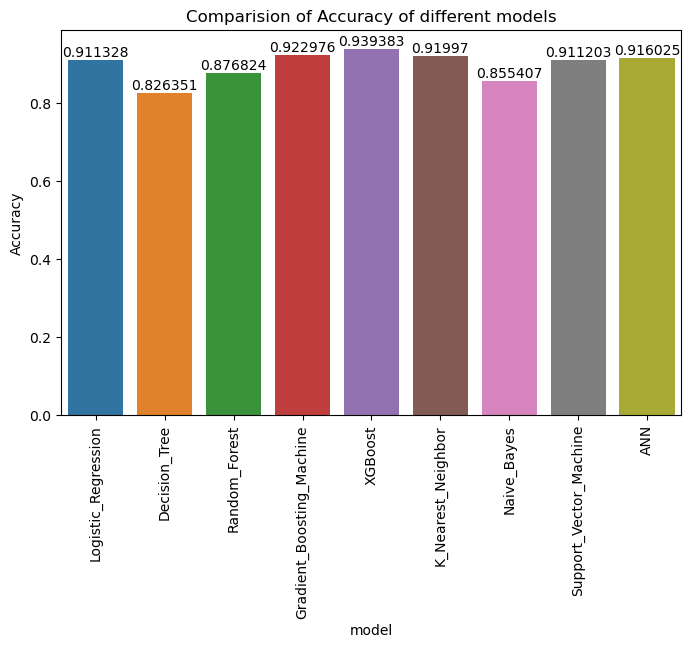

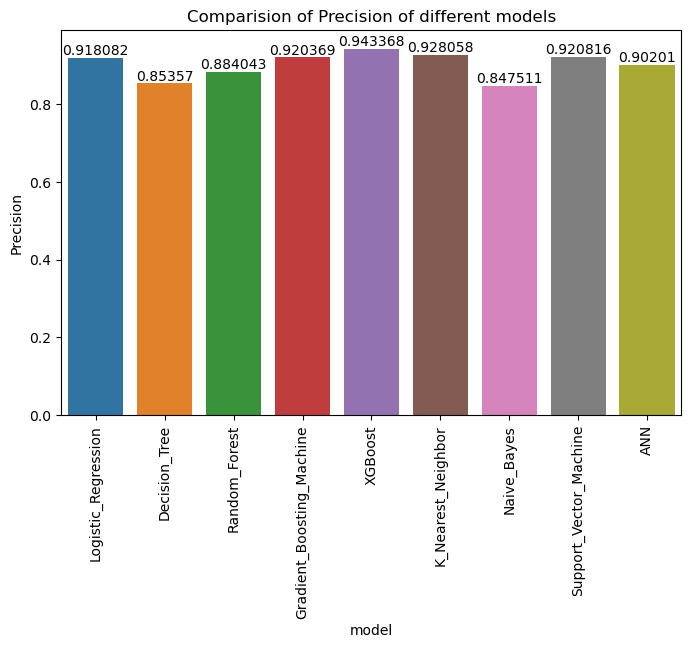

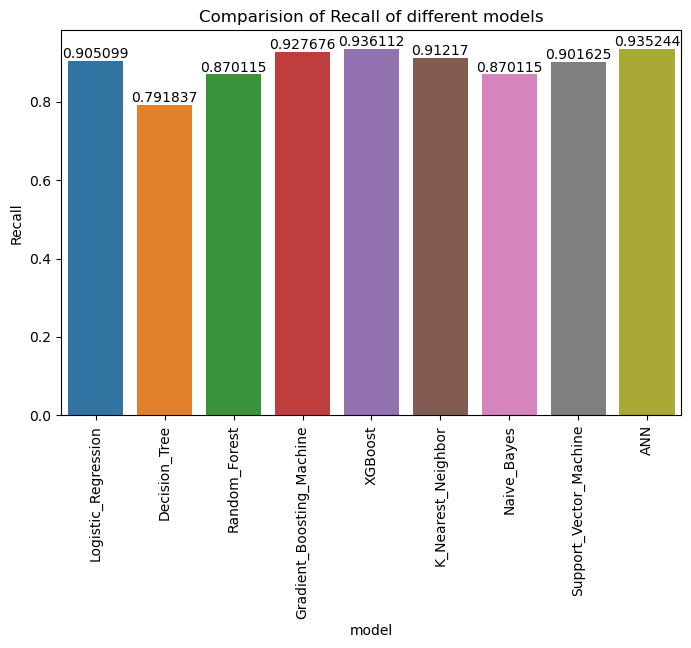

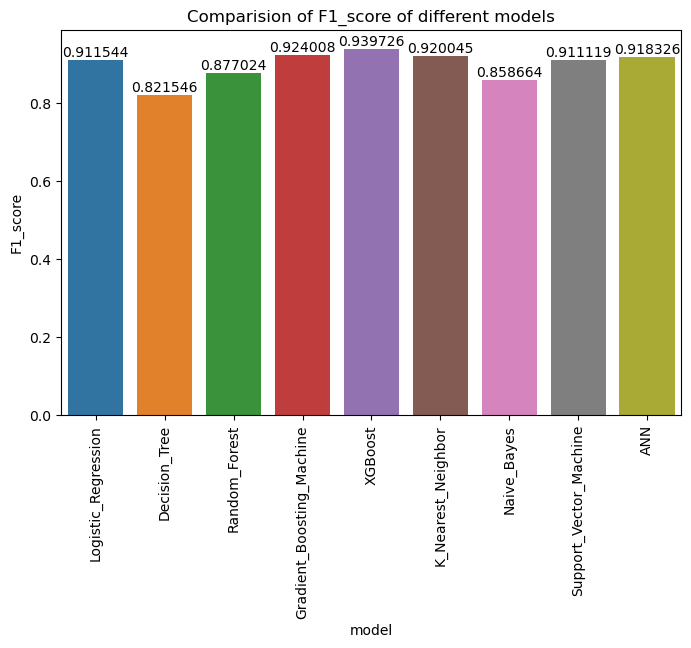

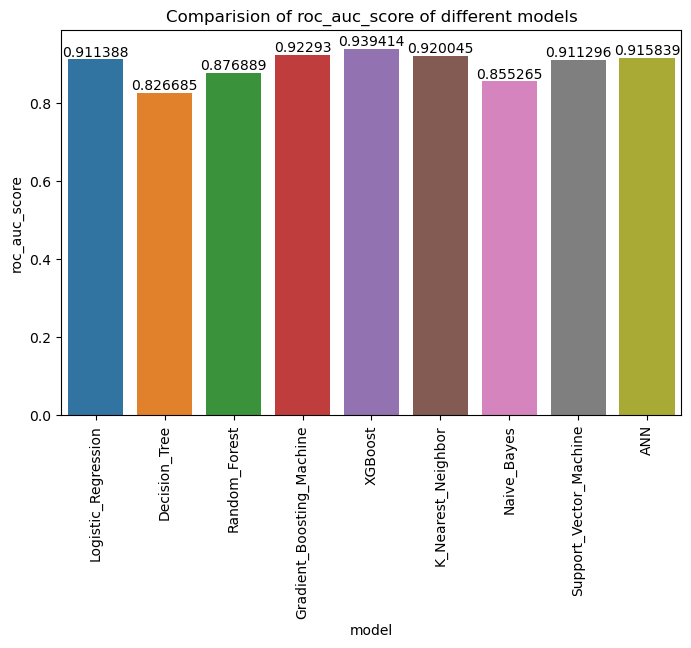

In [ ]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model','confusion matrix']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

**<u>Observations</u> :**
- Accuracy :- The XGBoost model has the highest accuracy (0.93) among all models. Models such as Logistic Regression, Gradient Boosting Machine, XGBoost, K-Nearest Neighbor, Support Vector Machine, and Artificial Neural Networks have accuracy greater than 90 percent.
- Precision - The XGBoost model has the highest precision (0.93) among all models. Models such as Logistic Regression, Gradient Boosting Machine, XGBoost, K-Nearest Neighbor, Support Vector Machine, and Artificial Neural Networks have precision greater than 90 percent.
- Recall :- Among all models, the XGBoost model had the highest recall (0.93). Recall is higher than 90% for models like Logistic Regression, Gradient Boosting Machine, XGBoost, K-Nearest Neighbor, Support Vector Machine, and Artificial Neural Networks.
- F1 score :- The model with the greatest F1 score (0.93) is XGBoost. F1 score is above 90% for models like Logistic Regression, Gradient Boosting Machine, XGBoost, K-Nearest Neighbor, Support Vector Machine, and Artificial Neural Networks.
- roc auc score :- Out of all models, the XGBoost model has the highest roc auc score (0.93). Models with roc auc scores above 90% include Logistic Regression, Gradient Boosting Machine, XGBoost, K-Nearest Neighbor, Support Vector Machine, and Artificial Neural Networks.
- #### ***Metrics like accuracy, precision, recall are good ways to evaluate classification models for balanced datasets, but if the data is imbalanced then other methods like ROC/AUC perform better in evaluating the model performance.***
- #### ***Among all models, the XGBoost classification model has the highest accuracy, precision, recall, and F1-score. Also, XGBoost has a roc_auc_score of 0.93, which is very close to 1, which means the classifier is able to perfectly distinguish between classes.***
- #### ***Due to its high accuracy (0.93), precision (0.93), recall (0.93), F1 score (0.93), and rou auc score (0.93), which is close to 1, the XGBoost classification model trained using cross validation is the ideal model and well-trained for predicting whether the client will subscribe to a term deposit or not.***

.

## **<u>Model Explainability and Feature Importance</u>**

#### **[1] Feature Importance**

- XGBoost classifier model is ideal cause it has highest accuracy, precision, recall, F1 score, and roc auc score, so Feature Importance for XGBoost classification model trained on cross validation.

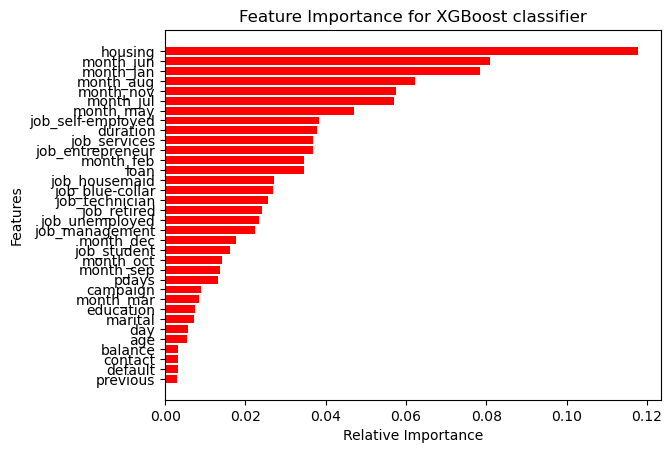

In [ ]:
# Feature Importance for XGBoost classification model

# Create instance for independant features names
features = df[independent_variables].columns

# Creating instance of feature importance
importances = xgb_cv['model'].best_estimator_.feature_importances_
indices = np.argsort(importances)

# Plot the graph for important feature
plt.title('Feature Importance for XGBoost classifier')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

**<u>Observations</u> :**
- The presence or absence of a housing loan has a significant impact on the model output used to predict whether a client will subscribe to a term deposit or not.
- A higher feature importance score for features like housing, month_jun  , and month_jan, indicates that those specific features have a greater influence on the model output used to predict whether or not a client will subscribe to a term deposit.
- Features such as day, age, balance, contact, previous, and default are very less impact on the model.

.

#### **[2] Model Explainability**

- Model explainability for XGBoost classification model trained using cross validation.

In [ ]:
# Install SHAP in environment
!pip install shap

In [ ]:
# Import shap and other necessary libearies
import shap
import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid')

Permutation explainer: 15970it [38:07,  6.98it/s]                            


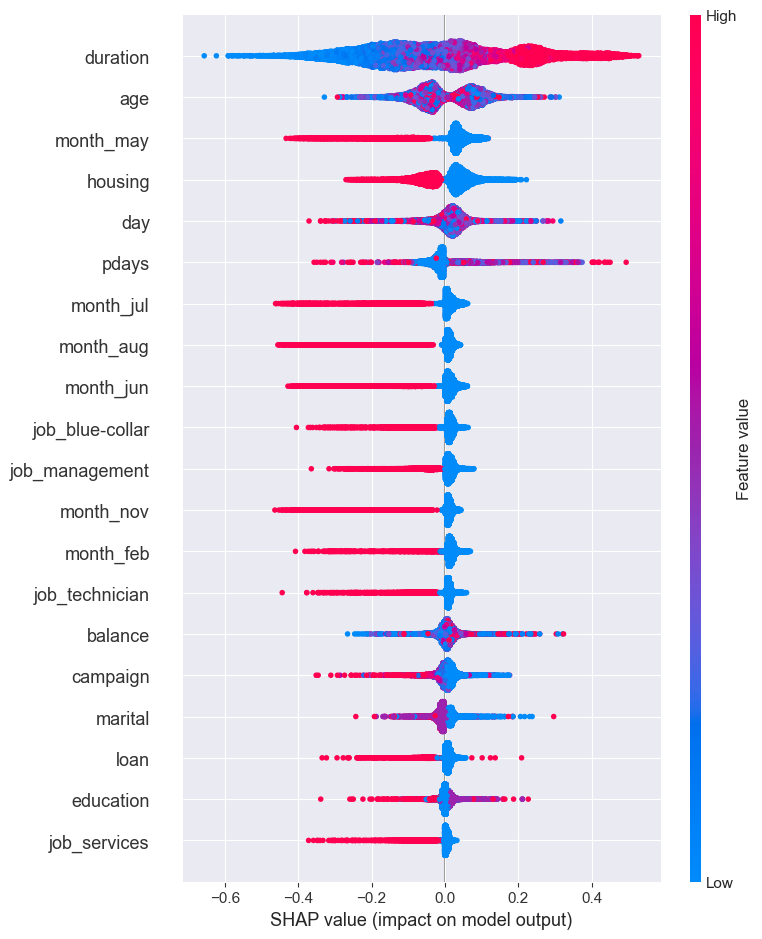

In [ ]:
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_cv['model'].predict, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=df[independent_variables].columns)

**<u>Observations</u> :**
- In descending order of their impact on the prediction of a model, the top five features are duration, age, month_may, housing, and day. We can get features from the shap summary plot in descending order of their impact on the prediction of a model.
- Higher values of features like month_may, housing, month_jul, month_jun, month_aug, blue-collar, management, month_feb, month_nov, job_technician, loan, campaign, education, and job_services have a negative impact on prediction, while lower values have a positive impact on the prediction.
- Higher values of feature duration have a positive impact, but lower values have a negative impact on prediction.
- Lower values of Age, day, and balance features have both positive and negative impacts on prediction.
- Overall, we can conclude that the model's prediction is positively impacted by lower values of the majority of the input features and negatively impacted by higher values of the majority of the input features.

.

## **<u>Conclusion </u>**

#### **<u>The following observations were made after importing and analyzing the data :</u>**
- **The average client is between the ages of 25 and 60, but the majority of bank term deposits are made by clients between the ages of 30 and 36.**
- **Most clients with blue-collar jobs do not subscribe to bank term deposits (20.52%), but most clients with managerial jobs do (2.88%).**
- **Most of the clients are married. Clients who are married are the most likely to subscribe to term deposits, and they are also the least likely to subscribe to term deposits.**
- **Most of the clients are married. Clients who are married are the most likely to subscribe to term deposits, and divorced clients are less likely to subscribe to term deposits.**
- **Clients who are more educated than the primary are more likely to sign up for a term deposit.**
- **Most of the clients who subscribed to term deposits have no credit in default.**
- **The majority of clients who have signed up for a term deposit do not have any housing loan.**
- **If a client has a housing loan, there is a 51% chance that they will not subscribe to a term deposit.**
- **Clients are more likely to subscribe to the term deposit if they do not have any personal loans.**
-  **If the client has a personal loan, there is a greater chance that they will not subscribe to a term deposit.**
- **The clients who were contacted with celluler are mostly subscribed to term deposits.**
- **Less than one percent of total clients contacted per day subscribe to term deposits.**
- **In May, June, July, August, and April, more than 1 percentage of clients subscribed to the term deposit, but other than this month, less than 1 percentage of clients subscribed to the term deposit.**
- **In June, July, August, and April, more than 1 percentage of clients subscribed to the term deposit, but other than this month, less than 1 percentage of clients subscribed to the term deposit. May's subscriber rate is more than double that of the other months of the year, a difference of more than 2 percentage.**
- **No one has signed up for term deposit if they have received more than three phone calls. Less than three times contacted clients who signed up for term deposits.**
- **Only 11.7% of total clients sign up for term deposits, which means that there is an 88.3% chance that clients will not subscribe to term deposits.**
- **Most clients who have management-related jobs and a tertiary degree have subscribed to the term deposits.**
- **Customers with a secondary education are the second most likely to subscribe to term deposits.**
- **Clients are more likely to subscribe to term deposits if they spend more time on the phone.**
- **Average of 400 seconds required to convey clients' intent to subscribe and make a term deposit**
- **A customer is more likely to sign up for a term deposit if he is entirely debt-free.**
- **Customers are less likely to choose a term deposit if they already have both types of loans.**

- ### **The XGBoost classification model has the highest accuracy, precision, recall, and F1-score of all the models. Furthermore, XGBoost has a roc auc score of 0.93, which is very close to one, indicating that the classifier is perfectly capable of differentiating between classes.**
- ### **The XGBoost classification model trained using cross validation is the ideal model and well-trained for predicting whether the client will subscribe to a term deposit or not due to its high accuracy (0.93), precision (0.93), recall (0.93), F1 score (0.93), and rou auc score (0.93), which is close to one.**